In [1]:
#import typing
#import io
#import os
import einops
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

from urllib.request import urlretrieve

from PIL import Image
from torchvision import transforms

from models.modeling import VisionTransformer, CONFIGS

import cv2

C:\Users\avs20\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#https://github.com/jacobgil/vit-explain/blob/main/vit_rollout.py
#https://pythonawesome.com/explainability-for-vision-transformers-in-pytorch/
#https://github.com/hila-chefer/Transformer-MM-Explainability/blob/main/Transformer_MM_explainability_ViT.ipynb
#https://jacobgil.github.io/deeplearning/vision-transformer-explainability#gradient-attention-rollout-for-class-specific-explainability
#https://arxiv.org/pdf/2012.09838v1.pdf

In [3]:

# Prepare Model
config = CONFIGS["ViT-B_16"]
model = VisionTransformer(config, num_classes=24, zero_head=False, img_size=224, vis=True)
checkpoint = torch.load("output/test_checkpoint.pth")  # Load the checkpoint
model.load_state_dict(checkpoint['state_dict'])
model.eval()

transform = transforms.Compose([
    #transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])
im = Image.open("augmented_data_test/img8504_flip_rescale_augmented.jpg")
x = transform(im)
x.size()

torch.Size([3, 224, 228])

In [4]:
#model(x.unsqueeze(0))[1]

C:\Users\avs20\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\module.py:1352: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Input tensor size: torch.Size([1, 197, 768])


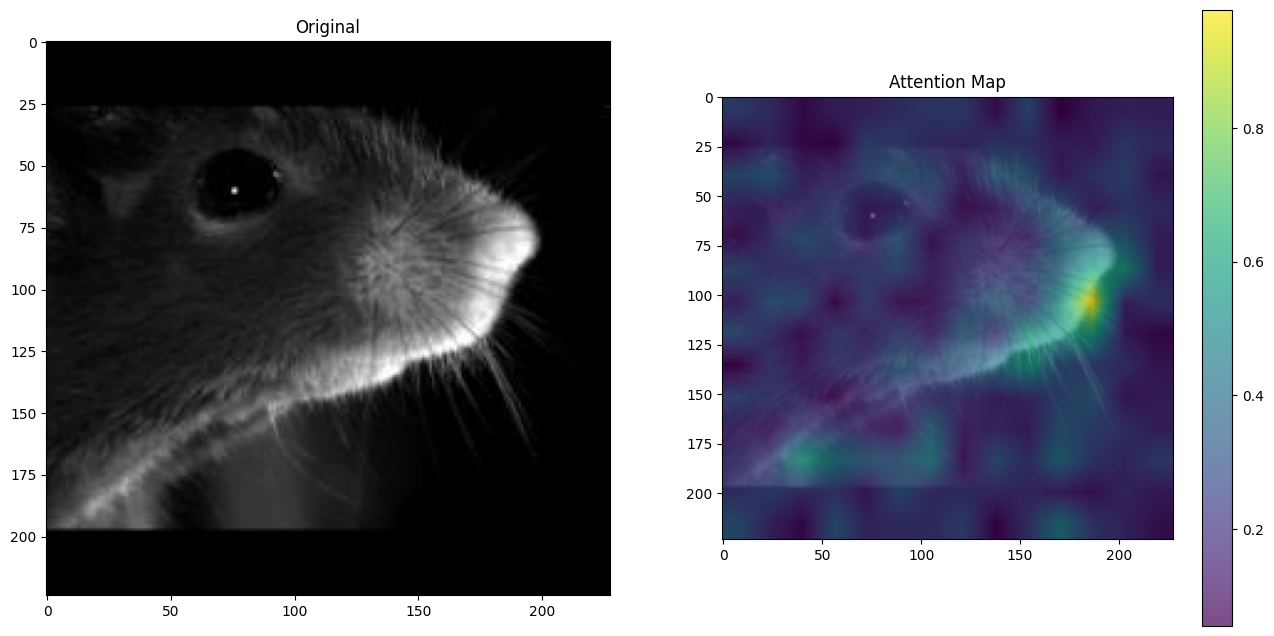

Input tensor size: torch.Size([1, 197, 768])


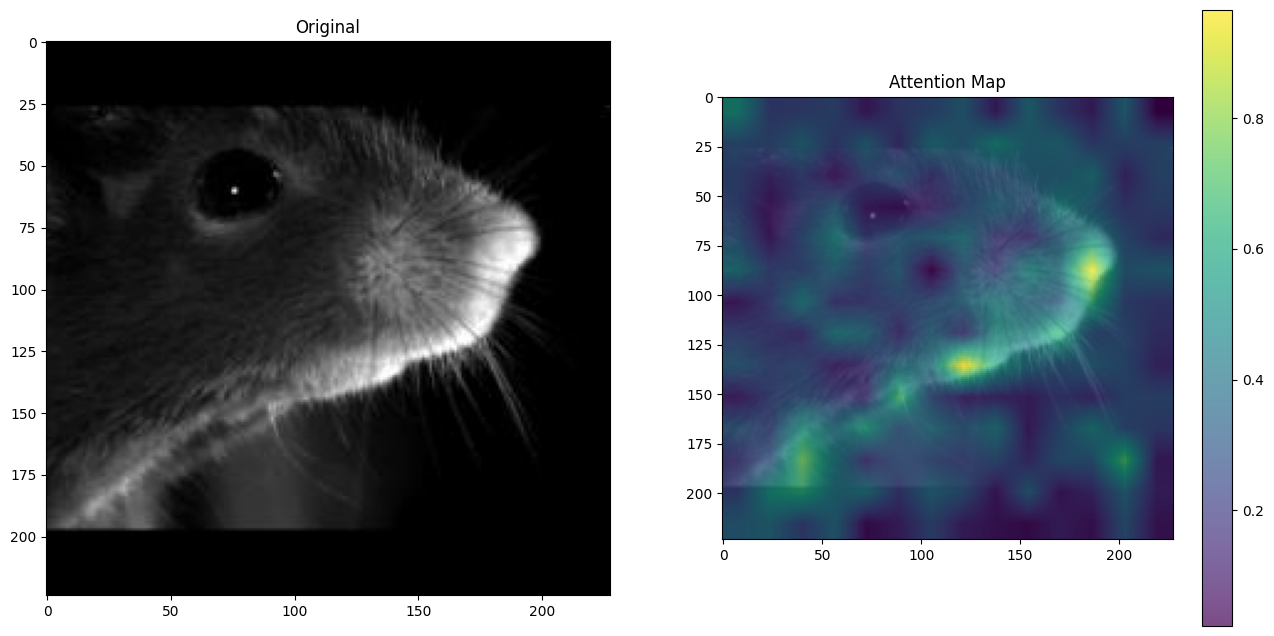

Input tensor size: torch.Size([1, 197, 768])


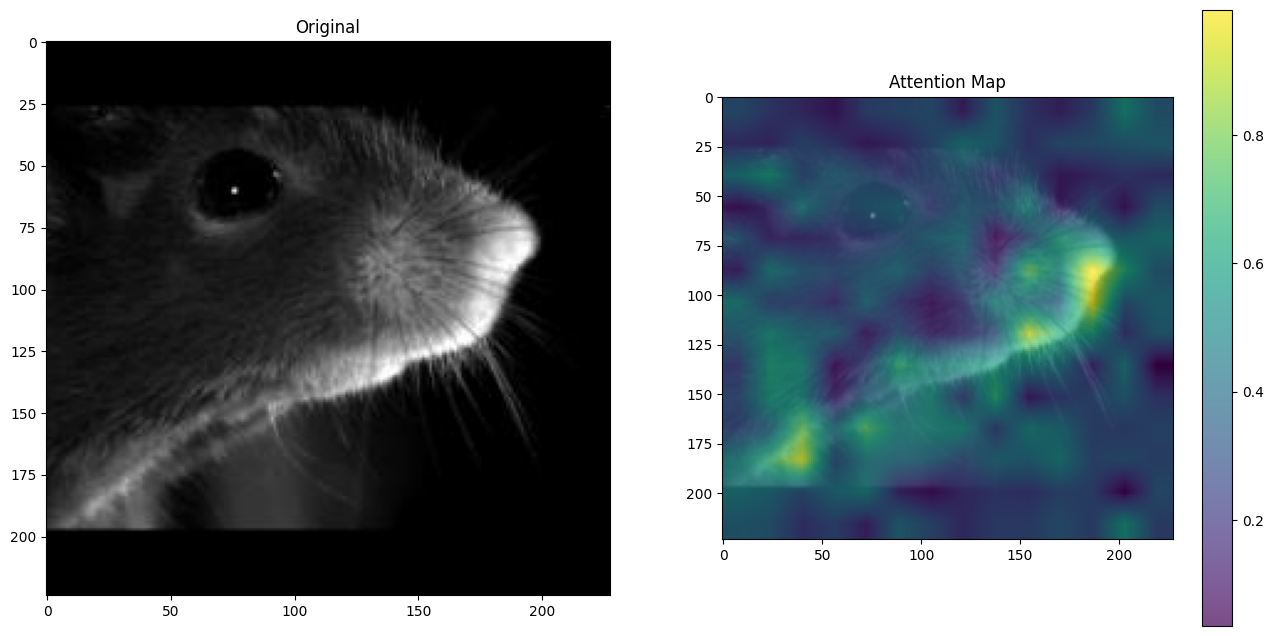

Input tensor size: torch.Size([1, 197, 768])


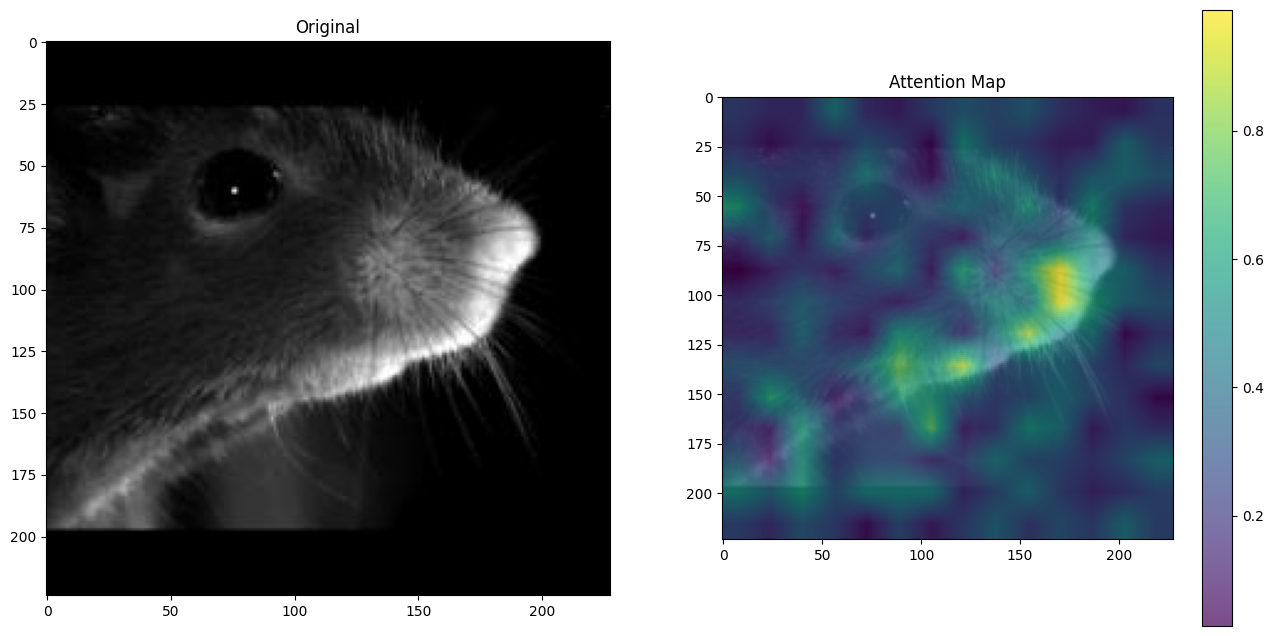

Input tensor size: torch.Size([1, 197, 768])


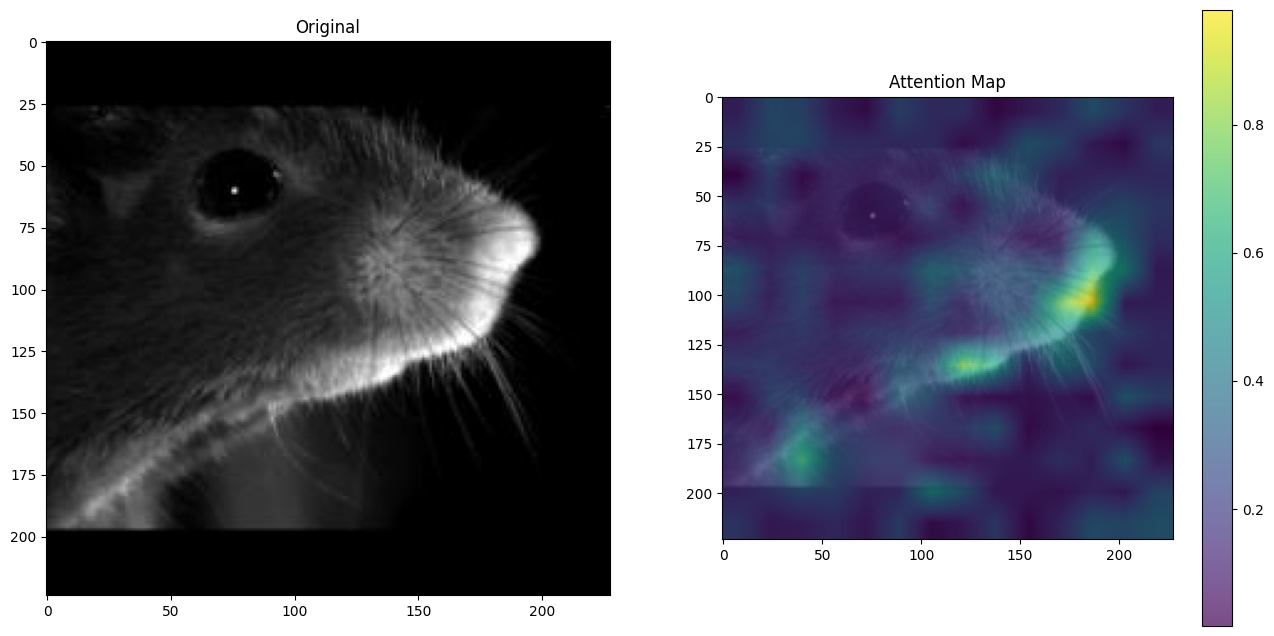

In [5]:
#This code is based on LINKS
# https://jacobgil.github.io/deeplearning/vision-transformer-explainability - repo for concept
# https://github.com/jacobgil/vit-explain/tree/main - code repo

from vit_grad_rollout import VITAttentionGradRollout

transform = transforms.Compose([
    #transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])
image = Image.open("augmented_data_test/img8504_flip_rescale_augmented.jpg")
x = transform(image)
x.size()

config = CONFIGS["ViT-B_16"]
model = VisionTransformer(config, num_classes=24, zero_head=False, img_size=224, vis=True)
for i in [0.0,0.2,0.5,0.7,0.9]:
    grad_rollout = VITAttentionGradRollout(model, discard_ratio=i) # read up on discard ratio
    mask = grad_rollout(x.unsqueeze(0), category_index=0) # change category index for different key points - 0:23
    np_img = np.array(image)[:, :, ::-1]
    mask = cv2.resize(mask, (np_img.shape[1], np_img.shape[0]))




    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 16))
    ax1.set_title('Original')
    ax2.set_title('Attention Map')
    # Display the original image
    ax1.imshow(image)
    # Display the attention map as a heatmap
    ax2.imshow(image)
    cax = ax2.imshow(mask, cmap='viridis', interpolation='nearest', alpha=0.7)
    fig.colorbar(cax, ax=ax2, orientation='vertical', shrink=0.5)
    plt.show()


Input tensor size: torch.Size([1, 197, 768])


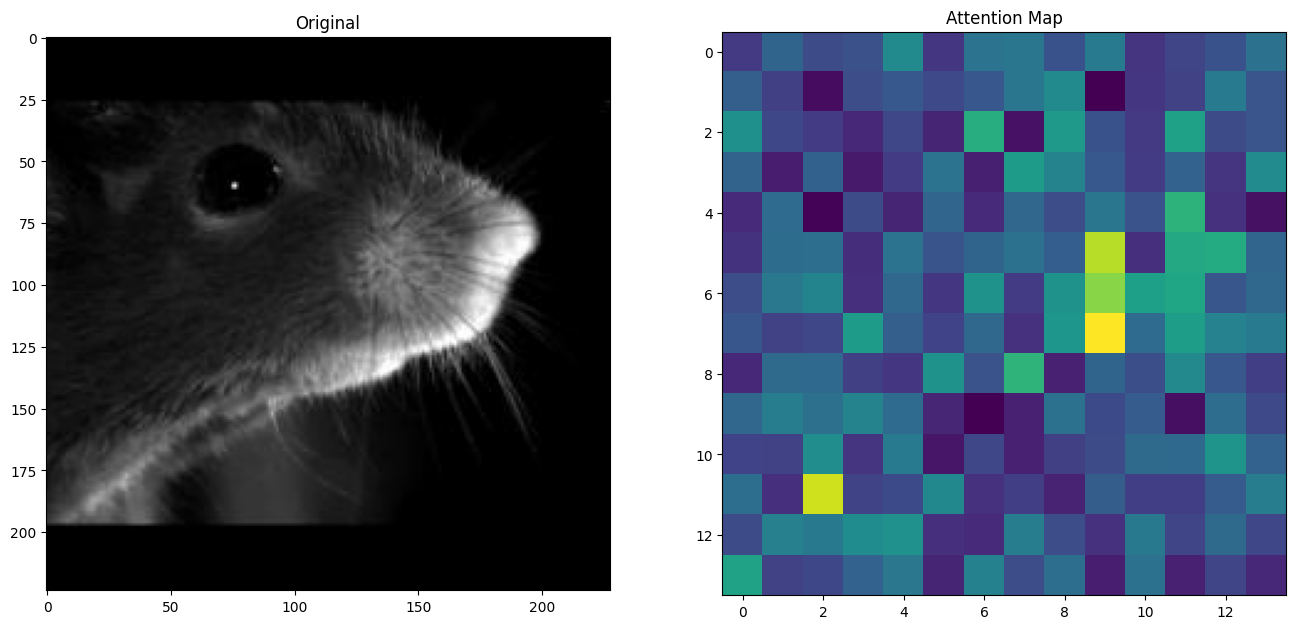

Input tensor size: torch.Size([1, 197, 768])


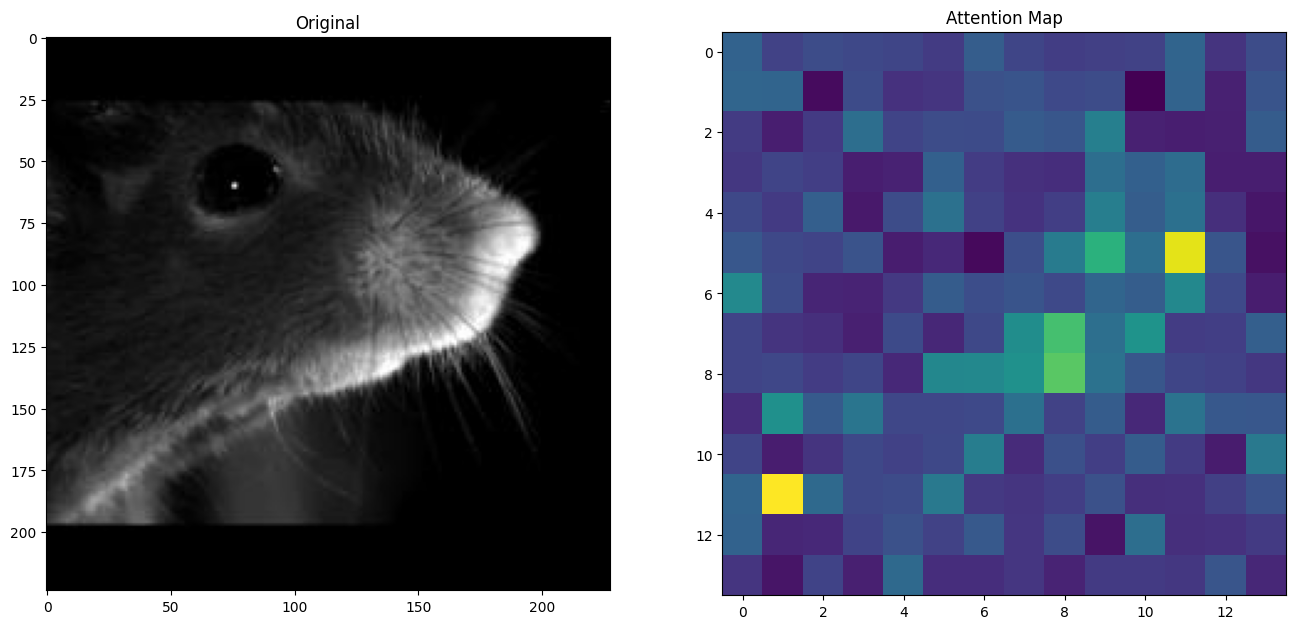

Input tensor size: torch.Size([1, 197, 768])


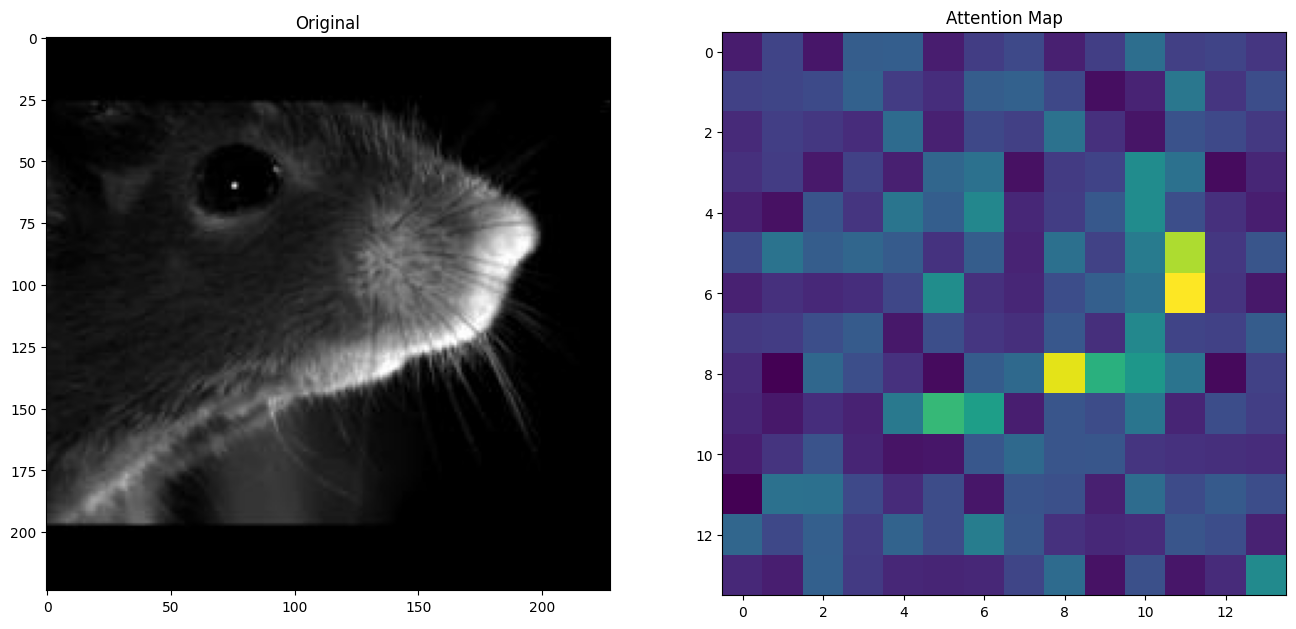

Input tensor size: torch.Size([1, 197, 768])


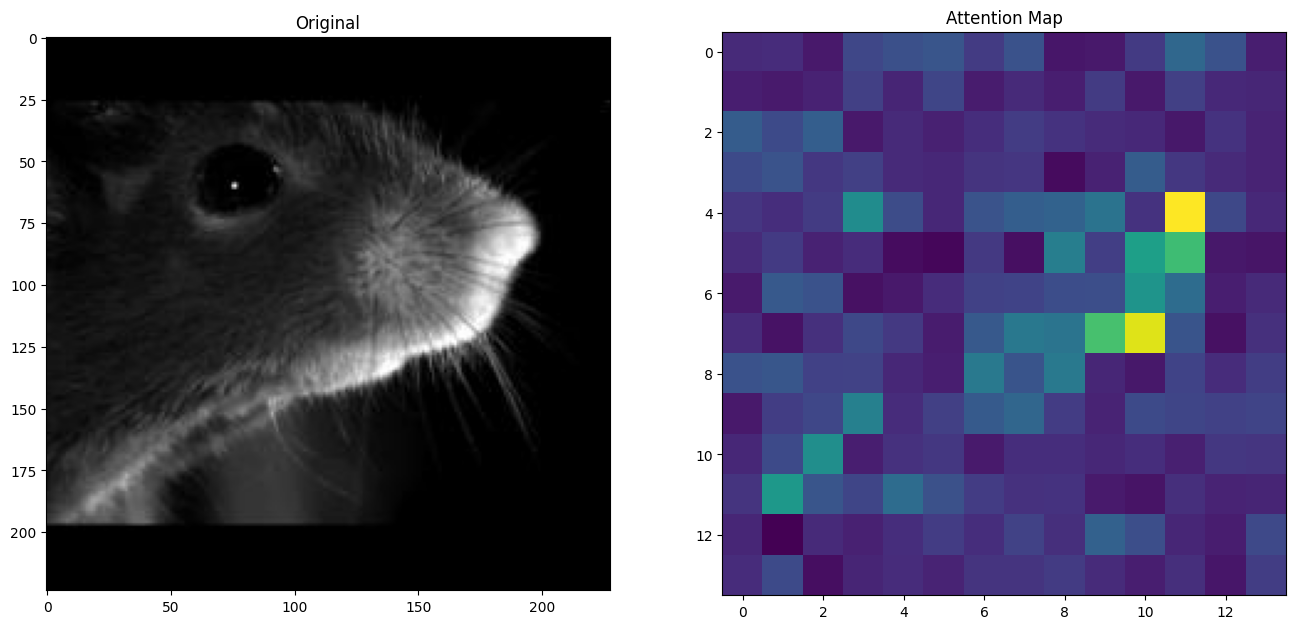

Input tensor size: torch.Size([1, 197, 768])


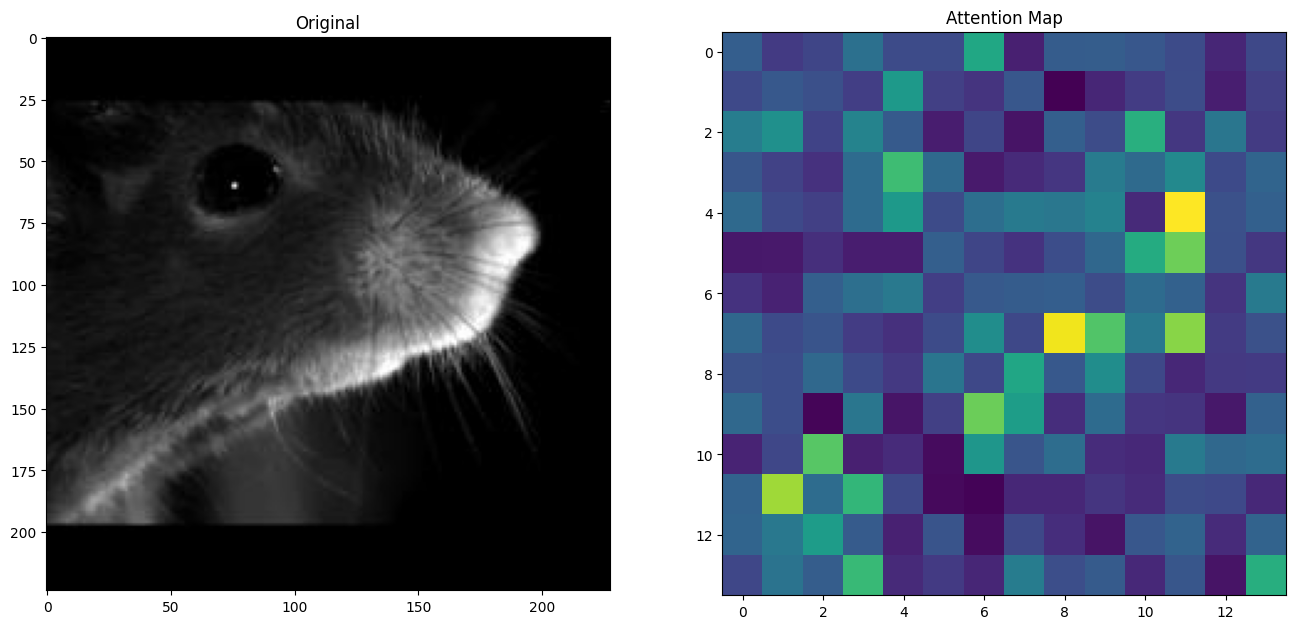

Input tensor size: torch.Size([1, 197, 768])


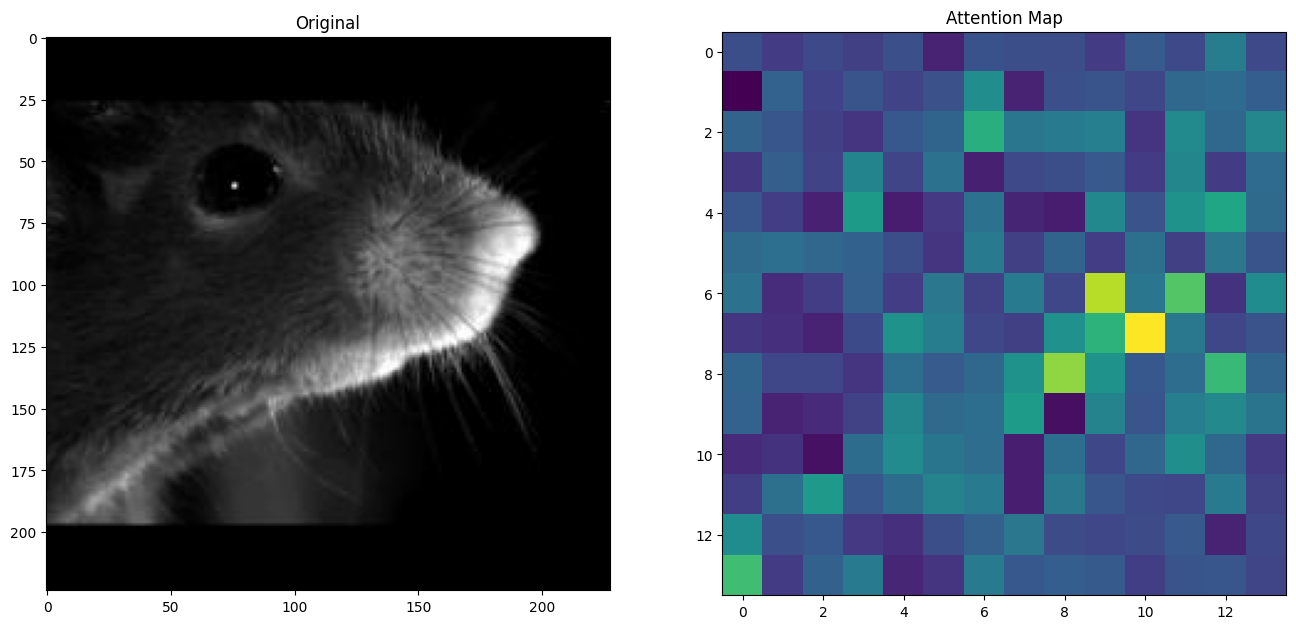

Input tensor size: torch.Size([1, 197, 768])


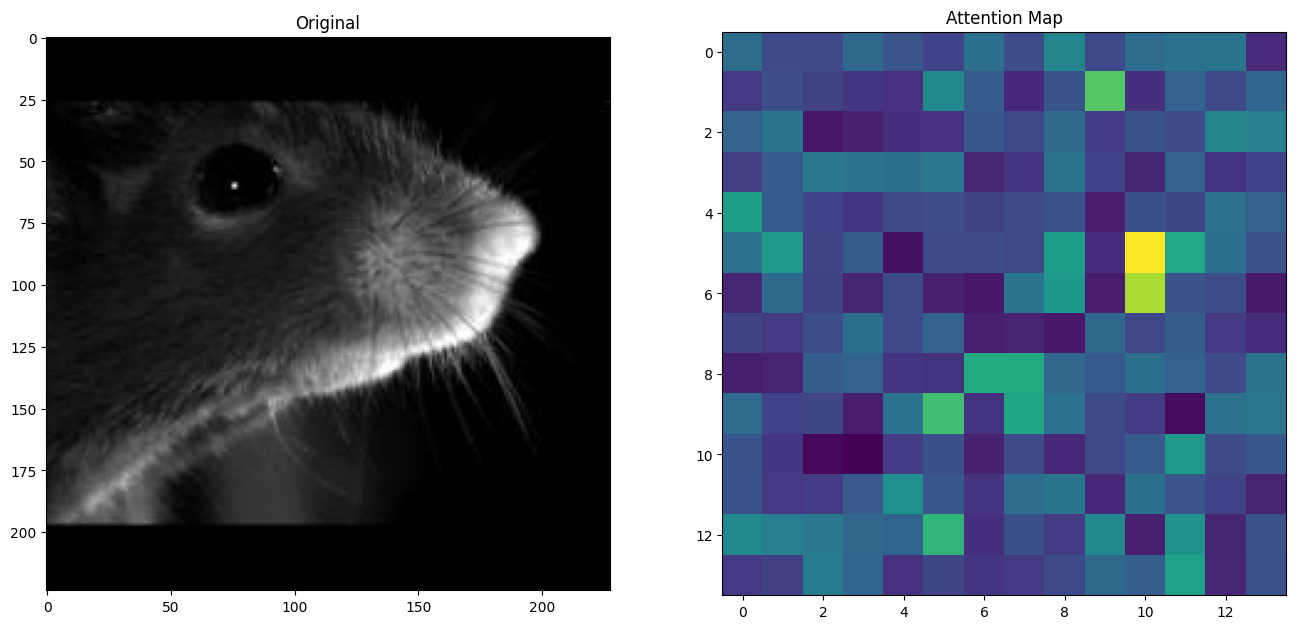

Input tensor size: torch.Size([1, 197, 768])


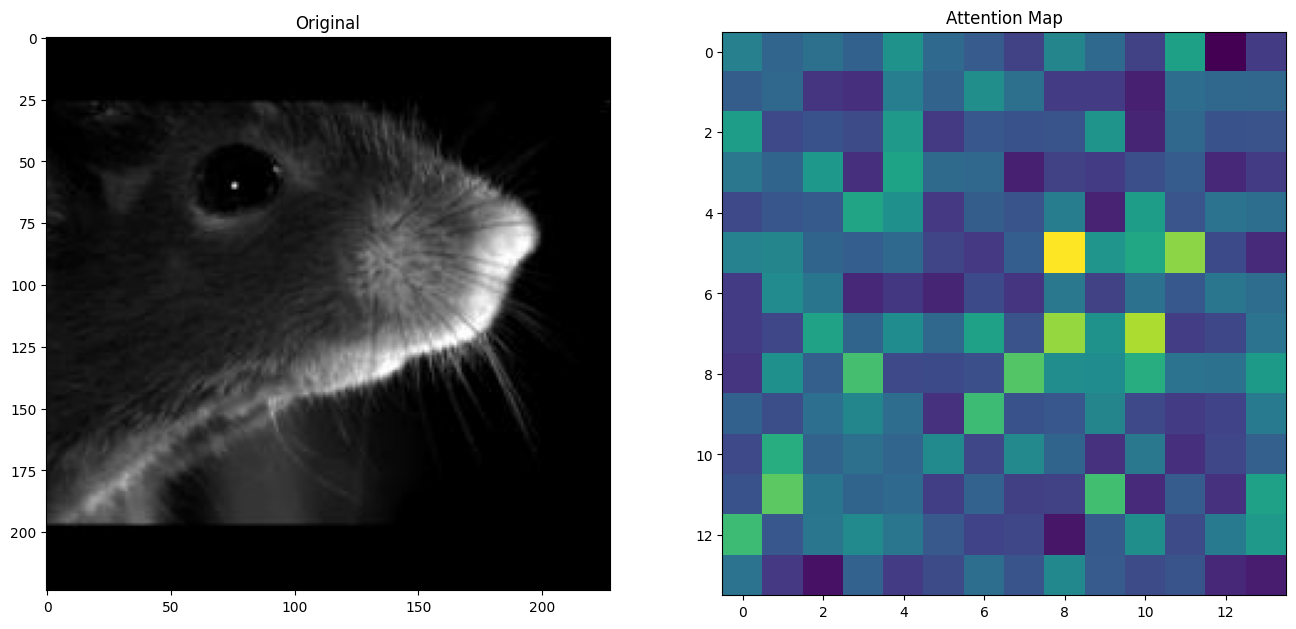

Input tensor size: torch.Size([1, 197, 768])


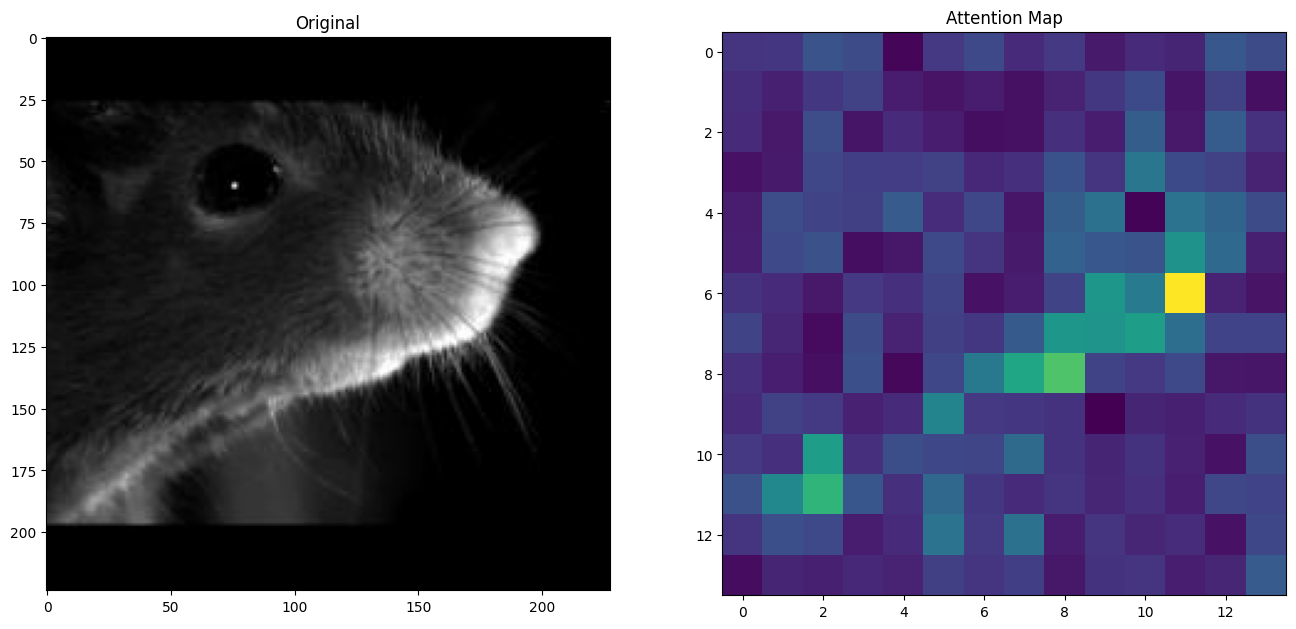

Input tensor size: torch.Size([1, 197, 768])


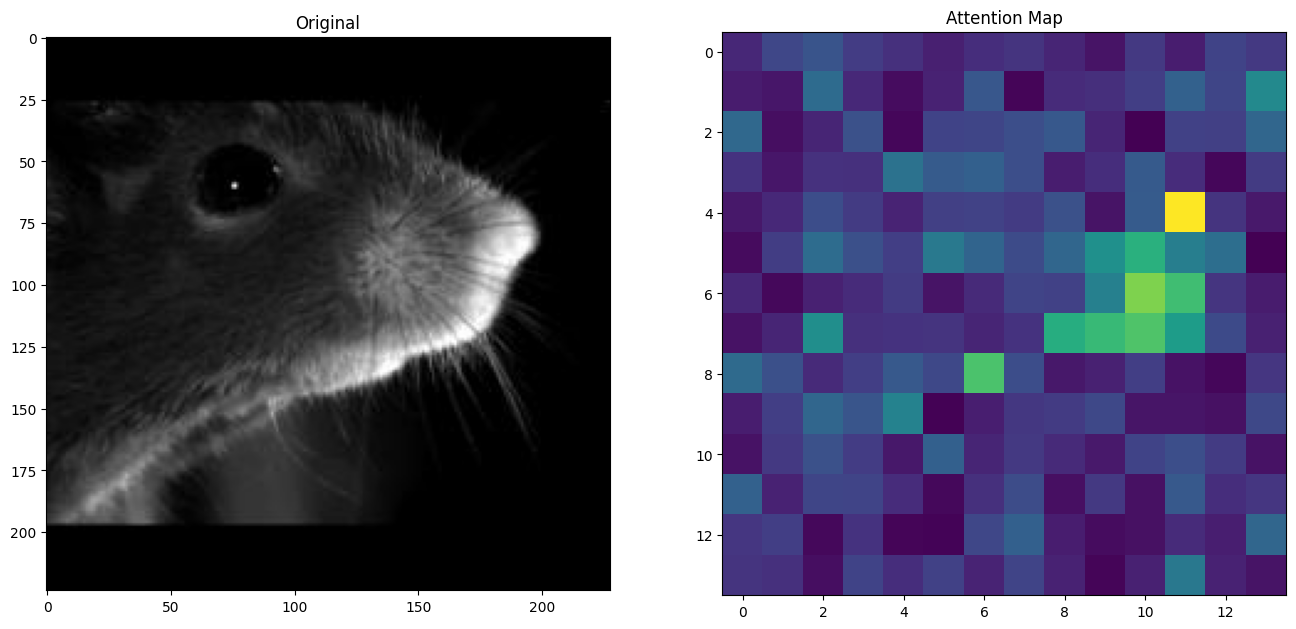

Input tensor size: torch.Size([1, 197, 768])


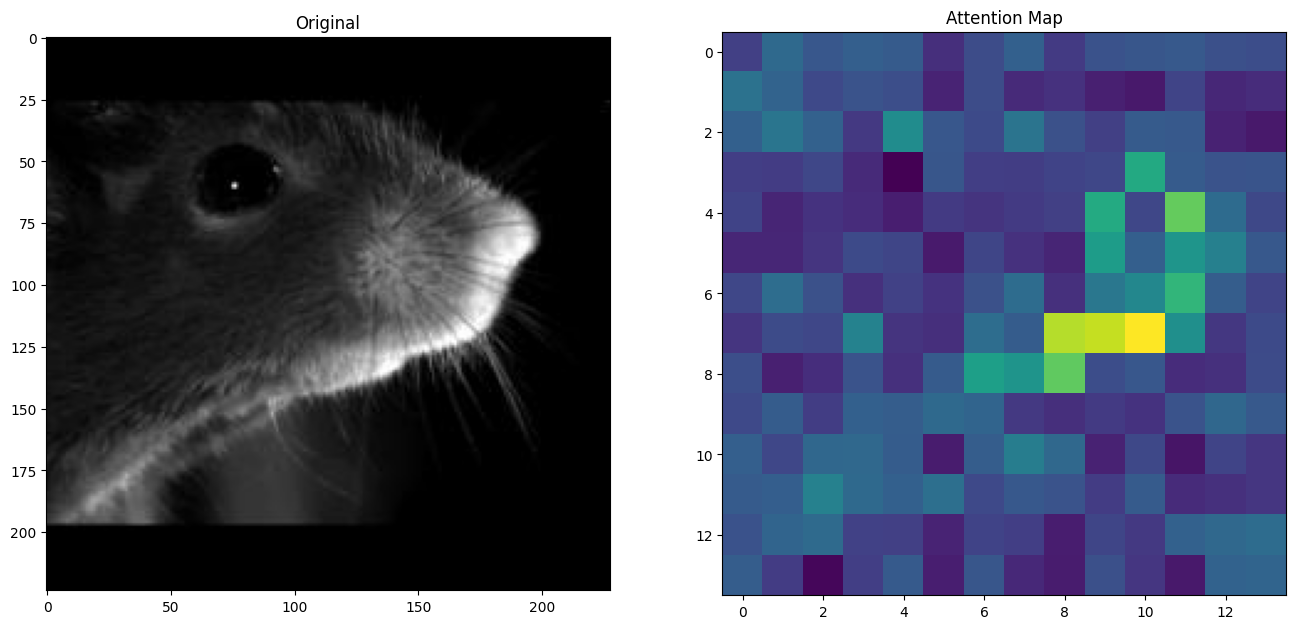

Input tensor size: torch.Size([1, 197, 768])


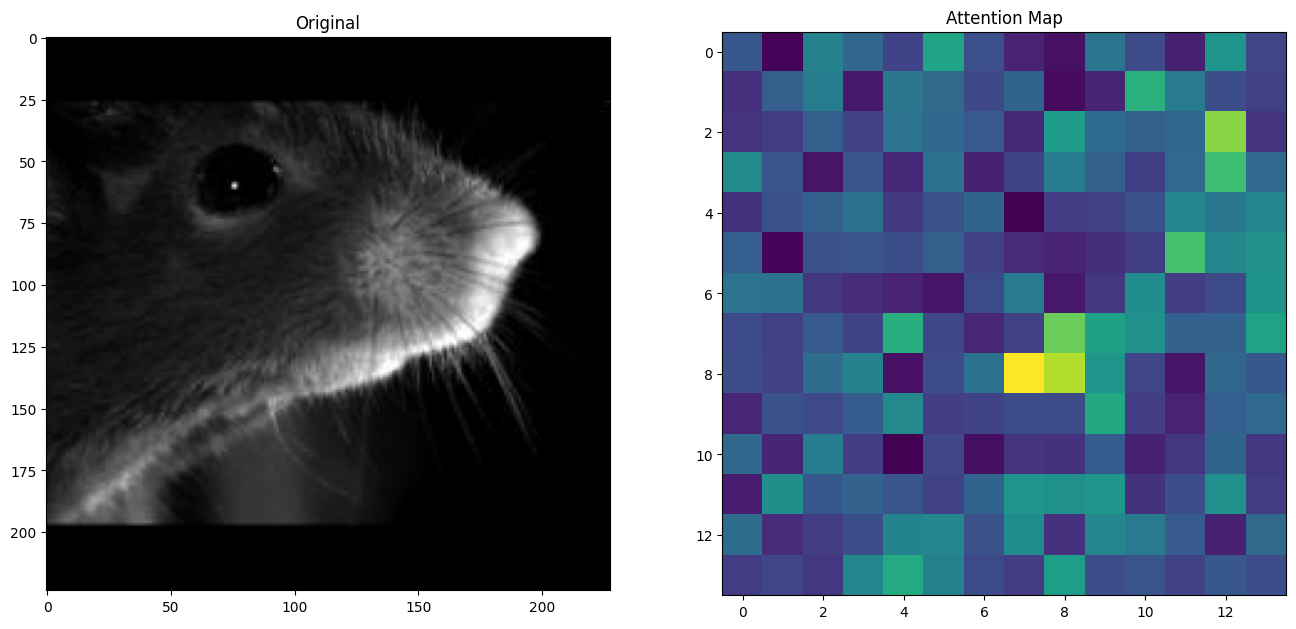

Input tensor size: torch.Size([1, 197, 768])


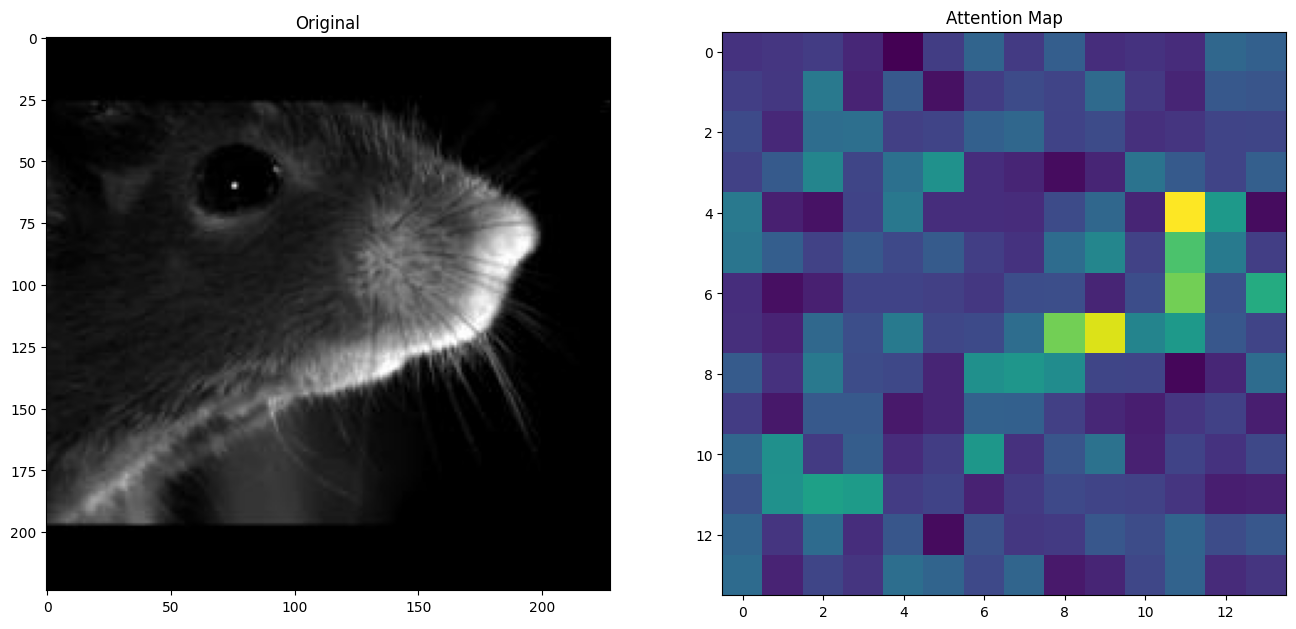

Input tensor size: torch.Size([1, 197, 768])


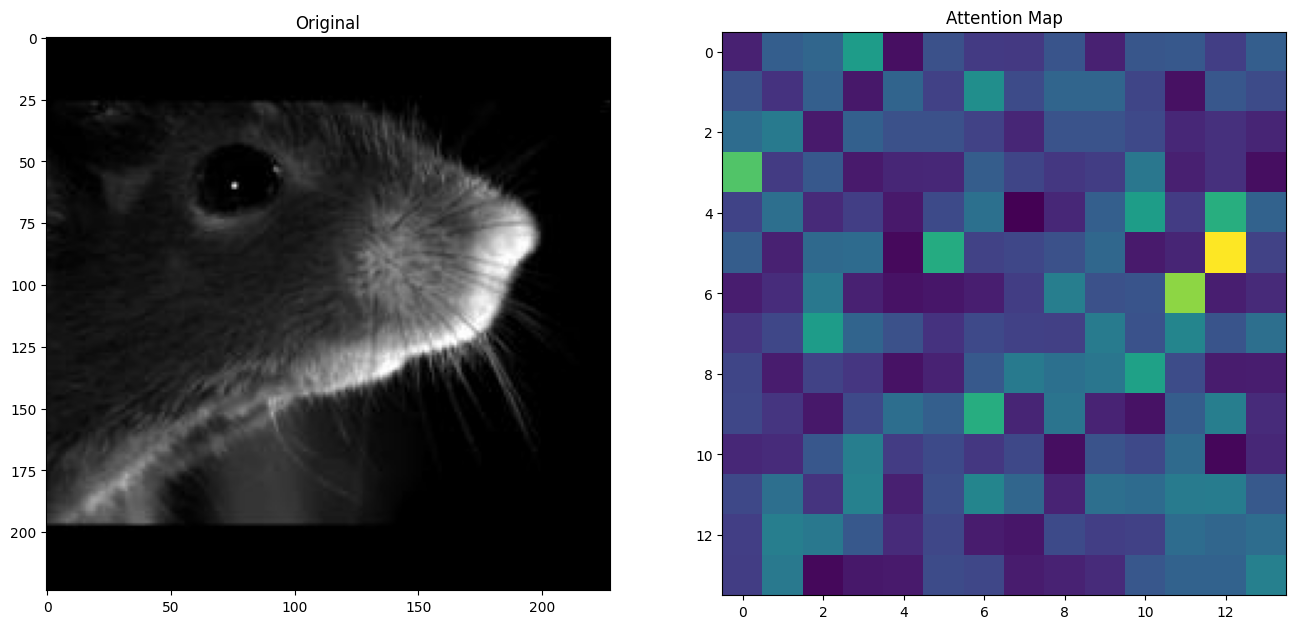

Input tensor size: torch.Size([1, 197, 768])


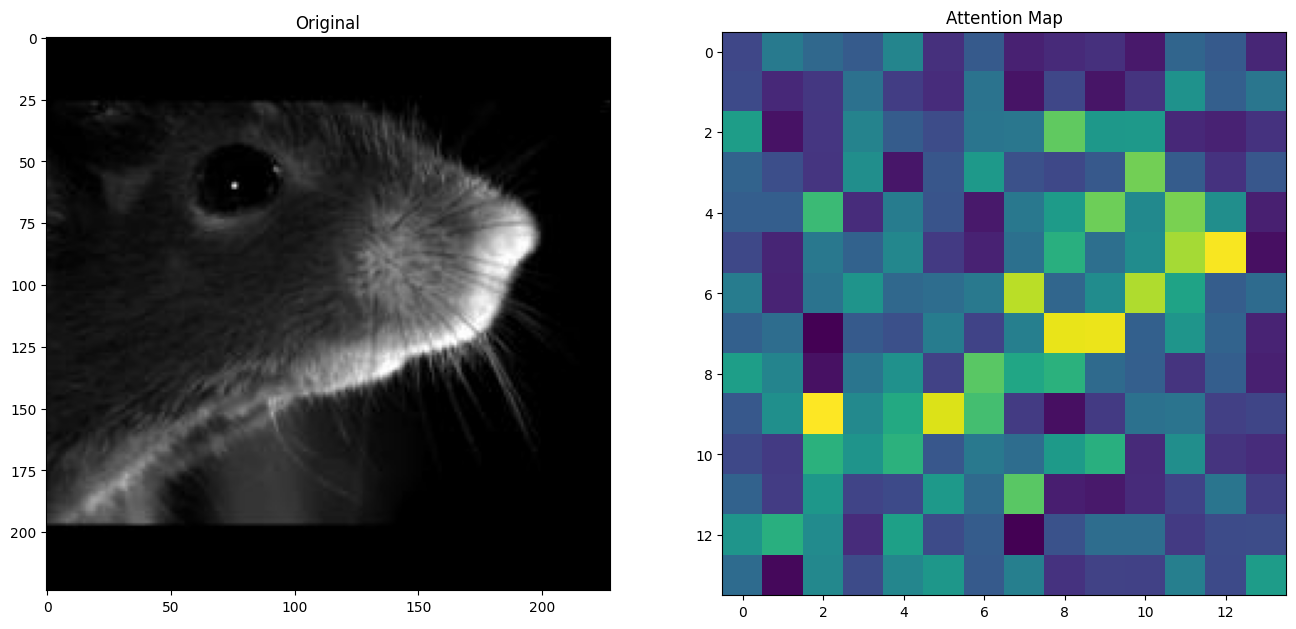

Input tensor size: torch.Size([1, 197, 768])


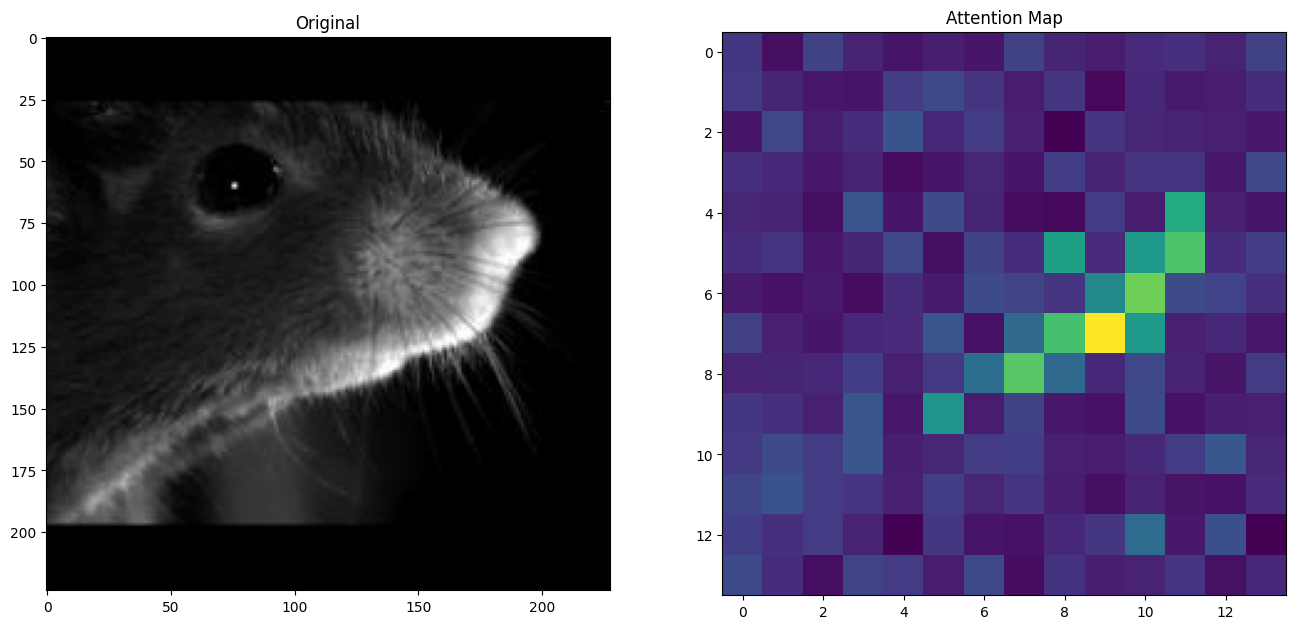

Input tensor size: torch.Size([1, 197, 768])


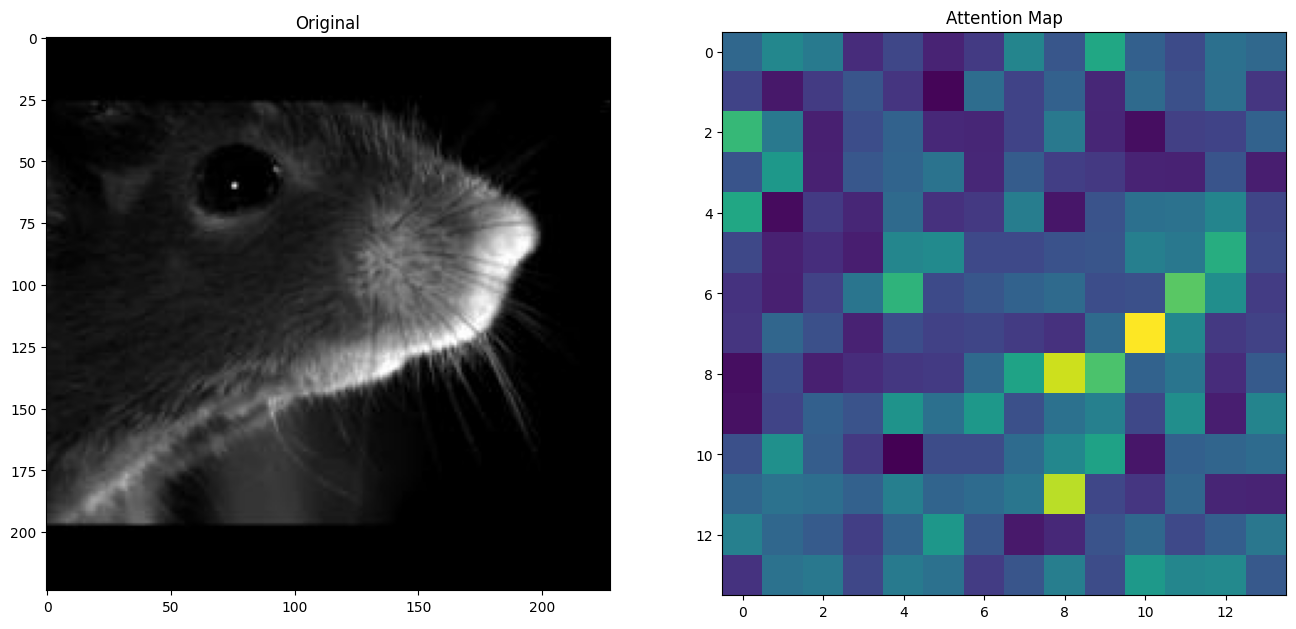

Input tensor size: torch.Size([1, 197, 768])


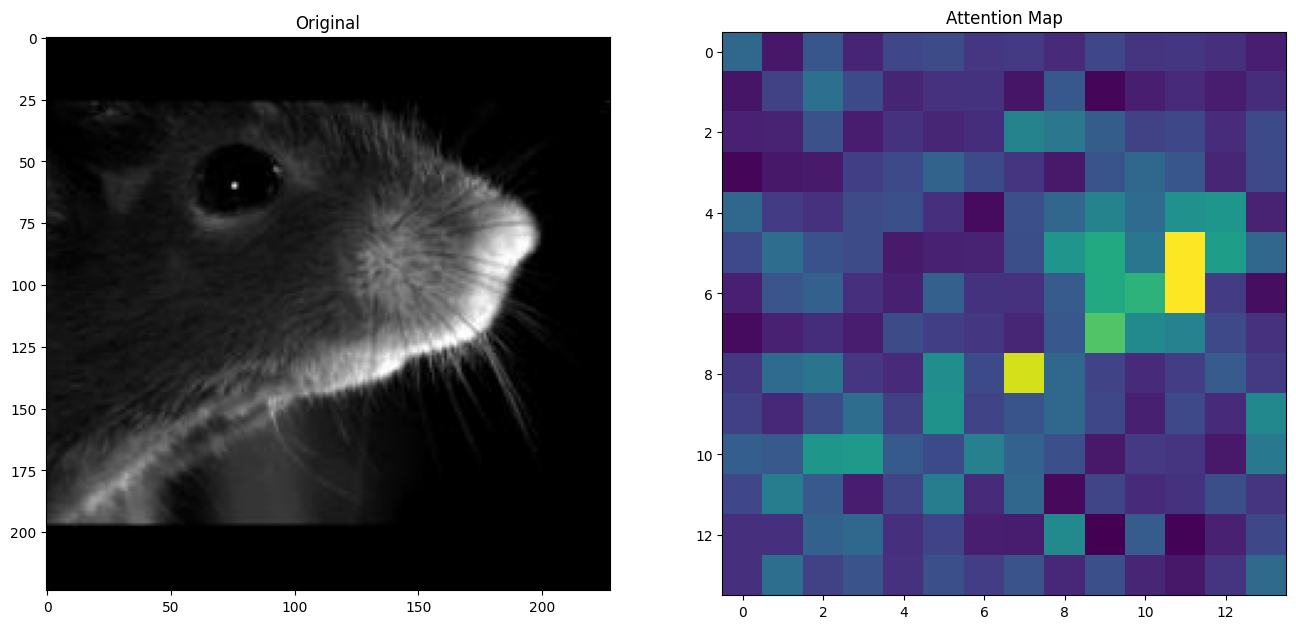

Input tensor size: torch.Size([1, 197, 768])


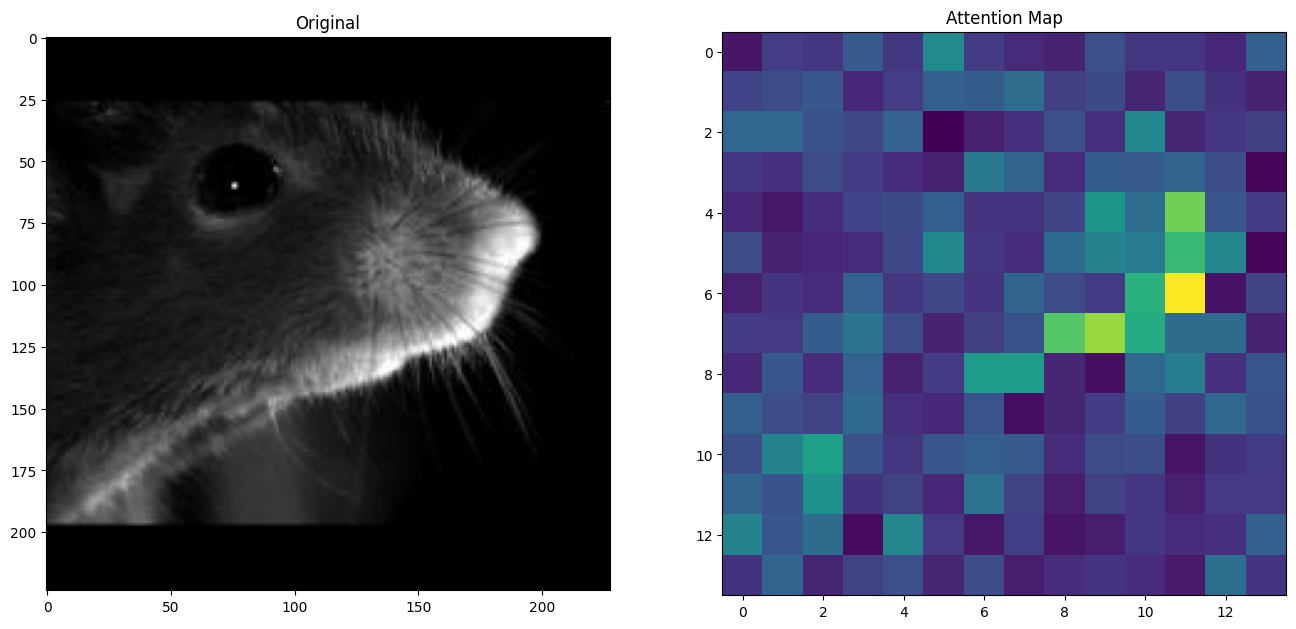

Input tensor size: torch.Size([1, 197, 768])


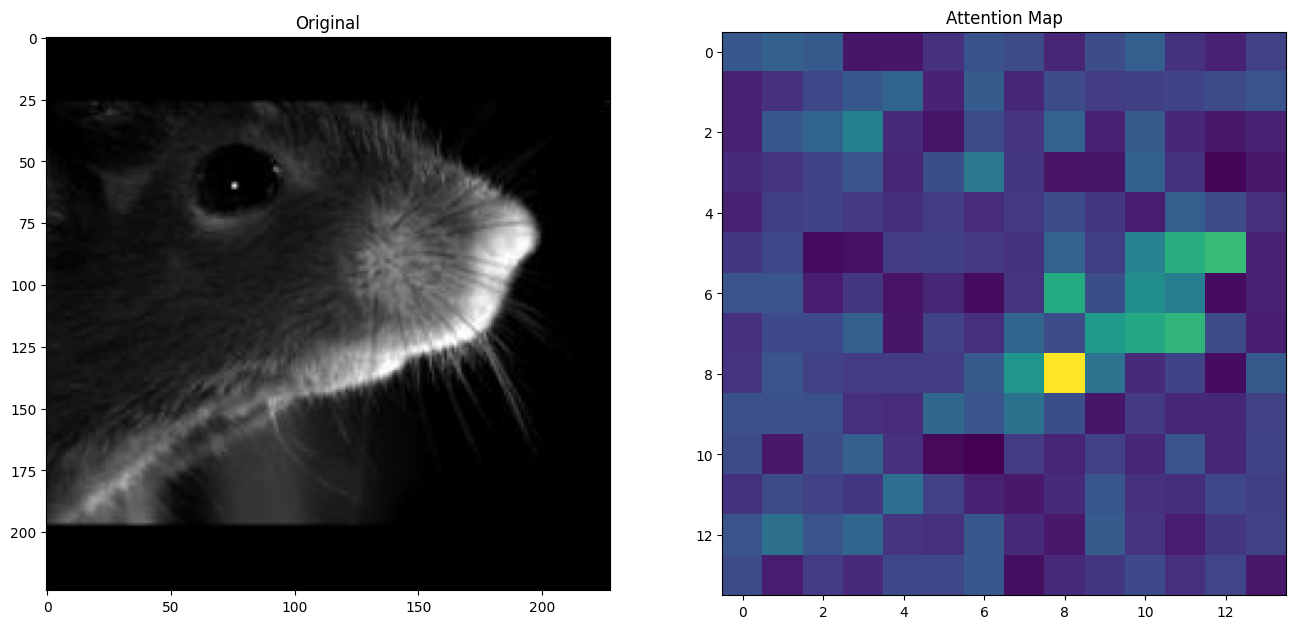

Input tensor size: torch.Size([1, 197, 768])


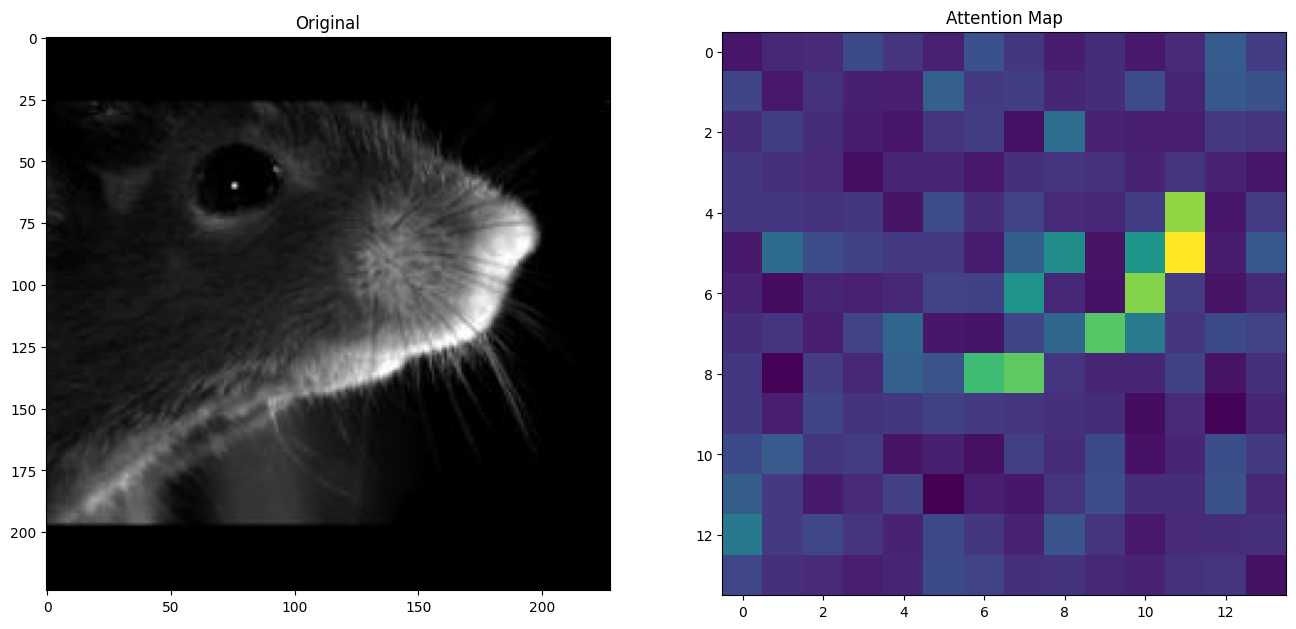

Input tensor size: torch.Size([1, 197, 768])


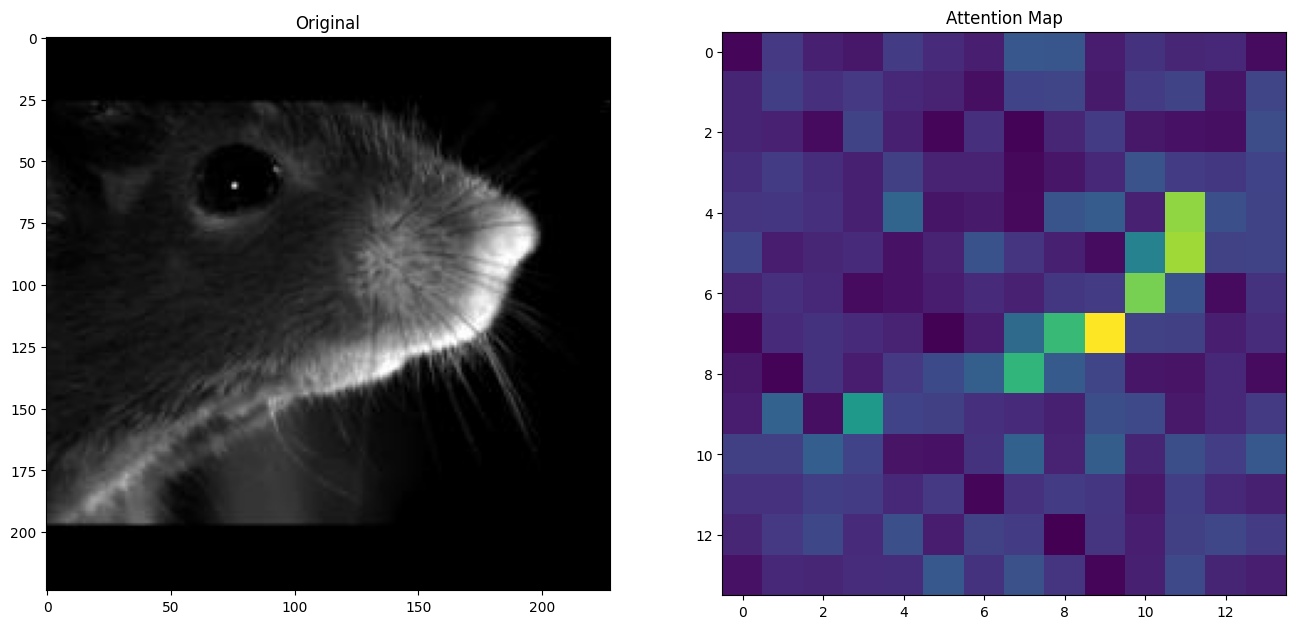

Input tensor size: torch.Size([1, 197, 768])


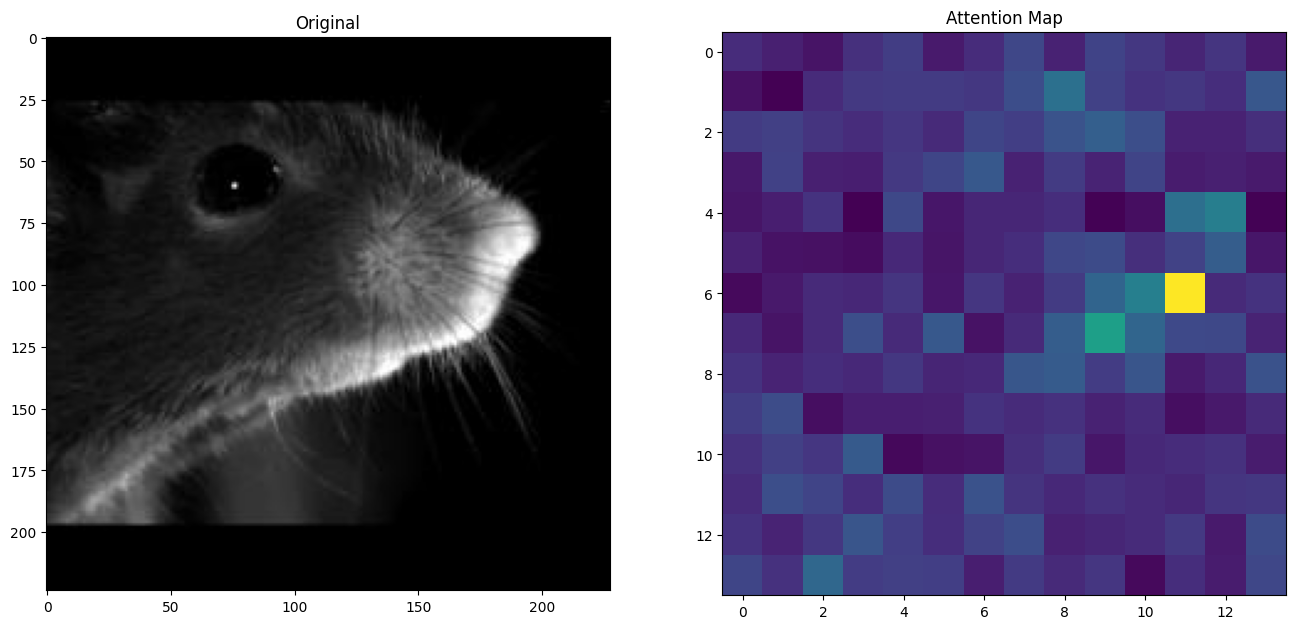

Input tensor size: torch.Size([1, 197, 768])


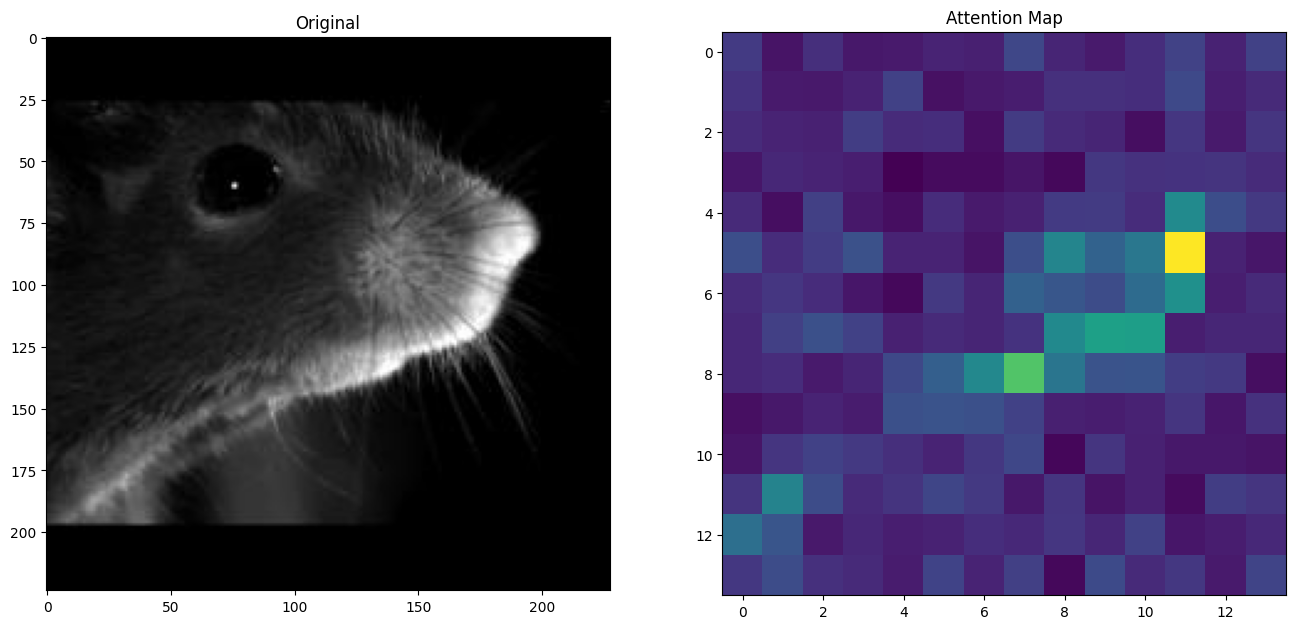

In [6]:
# Display the original image and attention map
for i in range(24):
    grad_rollout = VITAttentionGradRollout(model, discard_ratio=0.0)
    mask = grad_rollout(x.unsqueeze(0), category_index=i)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 16))

    ax1.set_title('Original')
    ax2.set_title('Attention Map')

    # Display the original image
    ax1.imshow(image)

    # Display the attention map as a heatmap
    ax2.imshow(mask)
    #cax = ax2.imshow(mask, cmap='viridis', interpolation='nearest', alpha=0.7)
    #fig.colorbar(cax, ax=ax2, orientation='vertical')

    plt.show()


In [7]:


#fig, axs = plt.subplots(1, 3)
#axs[0].imshow(image);
#axs[0].axis('off');

#output = model(x.unsqueeze(0))
#print_top_classes(output)

# cat - the predicted class
#cat = generate_visualization(x)

# dog 
# generate visualization for class 243: 'bull mastiff'
#dog = generate_visualization(x, class_index=0)


#axs[1].imshow(cat);
#axs[1].axis('off');
#axs[2].imshow(dog);
#axs[2].axis('off');

In [8]:
logits, att_mat = model(x.unsqueeze(0))

att_mat = torch.stack(att_mat).squeeze(1)
print(att_mat)

# Average the attention weights across all heads.
att_mat = torch.mean(att_mat, dim=1)

# To account for residual connections, we add an identity matrix to the
# attention matrix and re-normalize the weights.
residual_att = torch.eye(att_mat.size(1))
aug_att_mat = att_mat + residual_att
aug_att_mat = aug_att_mat / aug_att_mat.sum(dim=-1).unsqueeze(-1)

# Recursively multiply the weight matrices
joint_attentions = torch.zeros(aug_att_mat.size())
joint_attentions[0] = aug_att_mat[0]

for n in range(1, aug_att_mat.size(0)):
    joint_attentions[n] = torch.matmul(aug_att_mat[n], joint_attentions[n-1])
    
# Attention from the output token to the input space.
v = joint_attentions[-1]
grid_size = int(np.sqrt(aug_att_mat.size(-1)))
mask = v[0, 1:].reshape(grid_size, grid_size).detach().numpy()
mask = cv2.resize(mask / mask.max(), im.size)[..., np.newaxis]
result = (mask * im).astype("uint8")

Input tensor size: torch.Size([1, 197, 768])
tensor([[[[0.0052, 0.0051, 0.0051,  ..., 0.0051, 0.0051, 0.0051],
          [0.0056, 0.0068, 0.0058,  ..., 0.0052, 0.0054, 0.0056],
          [0.0059, 0.0066, 0.0059,  ..., 0.0057, 0.0051, 0.0052],
          ...,
          [0.0059, 0.0061, 0.0058,  ..., 0.0054, 0.0056, 0.0056],
          [0.0053, 0.0068, 0.0058,  ..., 0.0055, 0.0057, 0.0054],
          [0.0057, 0.0065, 0.0059,  ..., 0.0053, 0.0053, 0.0055]],

         [[0.0051, 0.0051, 0.0051,  ..., 0.0051, 0.0051, 0.0050],
          [0.0060, 0.0045, 0.0044,  ..., 0.0053, 0.0050, 0.0053],
          [0.0050, 0.0047, 0.0046,  ..., 0.0051, 0.0047, 0.0055],
          ...,
          [0.0049, 0.0047, 0.0046,  ..., 0.0051, 0.0046, 0.0055],
          [0.0051, 0.0046, 0.0045,  ..., 0.0053, 0.0045, 0.0054],
          [0.0052, 0.0047, 0.0044,  ..., 0.0055, 0.0050, 0.0055]],

         [[0.0050, 0.0051, 0.0051,  ..., 0.0051, 0.0051, 0.0051],
          [0.0063, 0.0047, 0.0055,  ..., 0.0043, 0.0040, 0.0045

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Assuming att_mat is obtained from your model
logits, att_mat = model(x.unsqueeze(0))
att_mat = torch.stack(att_mat).squeeze(1)
print(att_mat)

# Average the attention weights across all heads.
att_mat = torch.mean(att_mat, dim=1)

# To account for residual connections, we add an identity matrix to the
# attention matrix and re-normalize the weights.
residual_att = torch.eye(att_mat.size(1))
aug_att_mat = att_mat + residual_att
aug_att_mat = aug_att_mat / aug_att_mat.sum(dim=-1).unsqueeze(-1)

# Recursively multiply the weight matrices
joint_attentions = torch.zeros(aug_att_mat.size())
joint_attentions[0] = aug_att_mat[0]

for n in range(1, aug_att_mat.size(0)):
    joint_attentions[n] = torch.matmul(aug_att_mat[n], joint_attentions[n-1])
    
# Attention from the output token to the input space.
v = joint_attentions[-1]
grid_size = int(np.sqrt(aug_att_mat.size(-1)))
mask = v[0, 1:].reshape(grid_size, grid_size).detach().numpy()
mask = cv2.resize(mask / mask.max(), im.size)[..., np.newaxis]
result = (mask * im).astype("uint8")

Input tensor size: torch.Size([1, 197, 768])
tensor([[[[0.0052, 0.0051, 0.0051,  ..., 0.0051, 0.0051, 0.0051],
          [0.0061, 0.0039, 0.0038,  ..., 0.0044, 0.0055, 0.0048],
          [0.0060, 0.0043, 0.0041,  ..., 0.0046, 0.0054, 0.0049],
          ...,
          [0.0057, 0.0044, 0.0042,  ..., 0.0046, 0.0052, 0.0046],
          [0.0055, 0.0042, 0.0040,  ..., 0.0047, 0.0054, 0.0047],
          [0.0055, 0.0042, 0.0039,  ..., 0.0048, 0.0056, 0.0050]],

         [[0.0051, 0.0051, 0.0051,  ..., 0.0051, 0.0051, 0.0050],
          [0.0059, 0.0055, 0.0055,  ..., 0.0056, 0.0049, 0.0053],
          [0.0052, 0.0055, 0.0059,  ..., 0.0052, 0.0053, 0.0051],
          ...,
          [0.0051, 0.0055, 0.0057,  ..., 0.0052, 0.0048, 0.0053],
          [0.0048, 0.0055, 0.0059,  ..., 0.0056, 0.0052, 0.0052],
          [0.0051, 0.0055, 0.0062,  ..., 0.0051, 0.0050, 0.0049]],

         [[0.0051, 0.0051, 0.0051,  ..., 0.0051, 0.0051, 0.0051],
          [0.0059, 0.0044, 0.0047,  ..., 0.0052, 0.0046, 0.0051

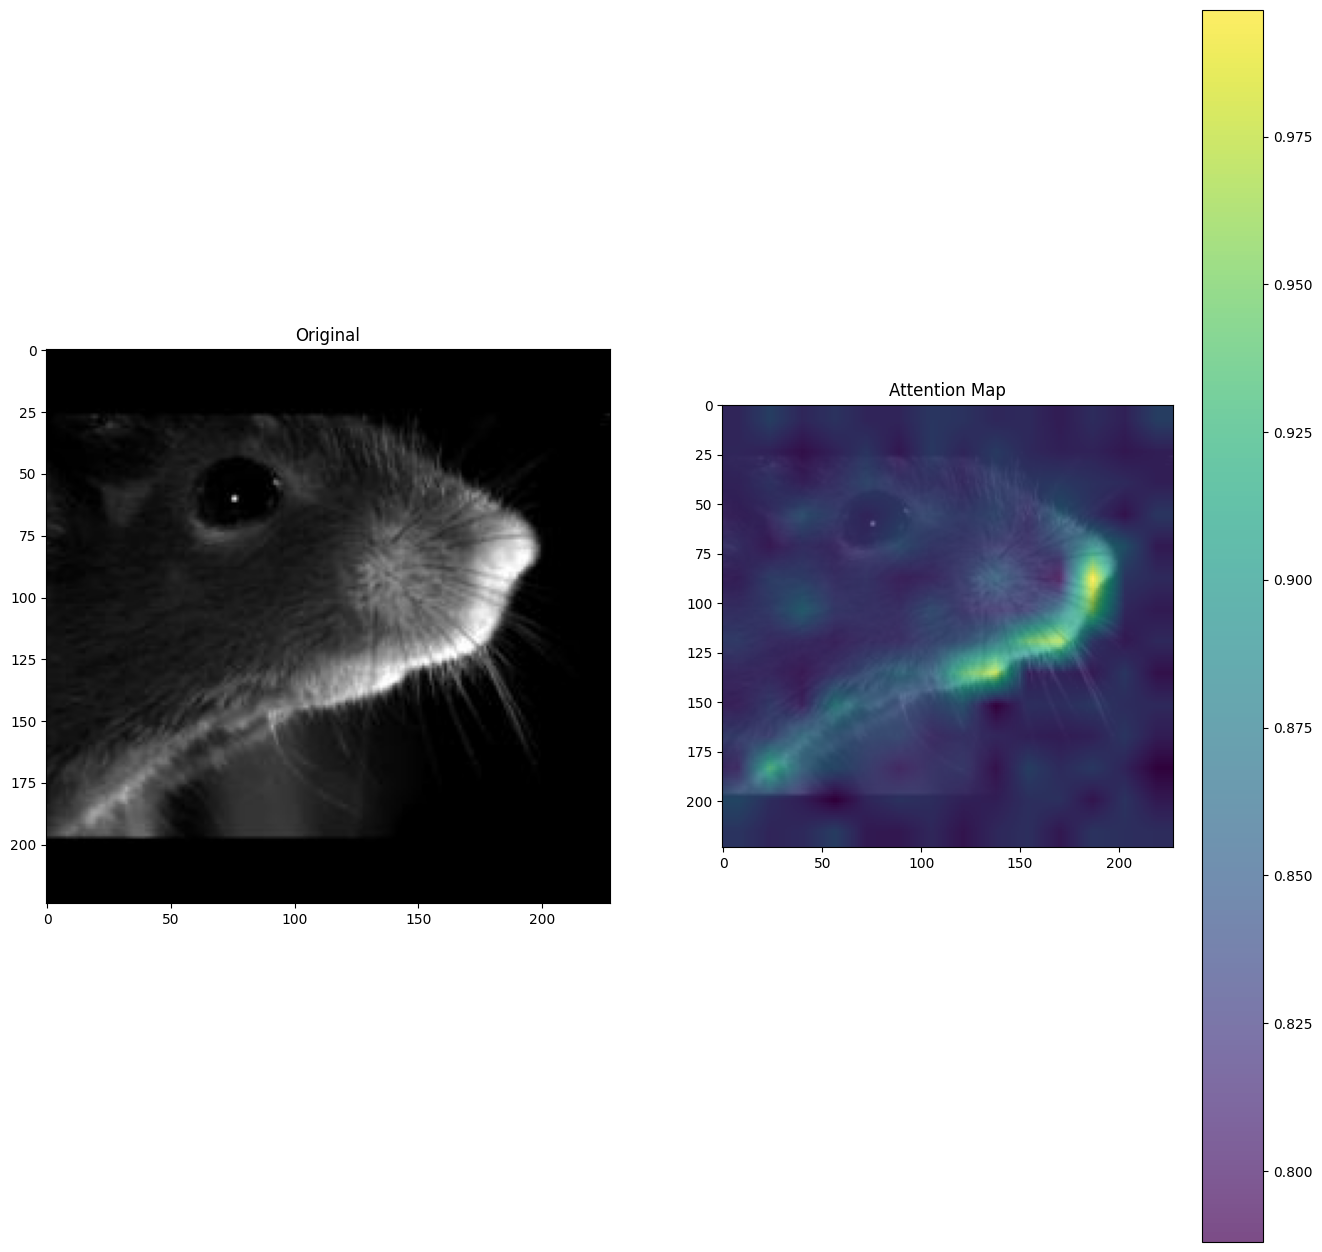

In [10]:
# Display the original image and attention map
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 16))

ax1.set_title('Original')
ax2.set_title('Attention Map')

# Display the original image
ax1.imshow(im)

# Display the attention map as a heatmap
ax2.imshow(im)
cax = ax2.imshow(mask, cmap='viridis', interpolation='nearest', alpha=0.7)
fig.colorbar(cax, ax=ax2, orientation='vertical')

plt.show()

### Reference
* [attention_flow](https://github.com/samiraabnar/attention_flow)
* [vit-keras](https://github.com/faustomorales/vit-keras)

Input tensor size: torch.Size([1, 197, 768])
tensor([[[[0.0052, 0.0050, 0.0050,  ..., 0.0051, 0.0051, 0.0051],
          [0.0055, 0.0048, 0.0055,  ..., 0.0040, 0.0051, 0.0052],
          [0.0050, 0.0051, 0.0056,  ..., 0.0041, 0.0050, 0.0051],
          ...,
          [0.0055, 0.0050, 0.0058,  ..., 0.0038, 0.0051, 0.0050],
          [0.0054, 0.0051, 0.0055,  ..., 0.0041, 0.0050, 0.0048],
          [0.0049, 0.0047, 0.0050,  ..., 0.0043, 0.0050, 0.0048]],

         [[0.0051, 0.0051, 0.0051,  ..., 0.0051, 0.0051, 0.0050],
          [0.0050, 0.0046, 0.0040,  ..., 0.0056, 0.0048, 0.0051],
          [0.0044, 0.0047, 0.0041,  ..., 0.0059, 0.0052, 0.0053],
          ...,
          [0.0052, 0.0042, 0.0041,  ..., 0.0062, 0.0051, 0.0051],
          [0.0052, 0.0044, 0.0039,  ..., 0.0058, 0.0049, 0.0057],
          [0.0047, 0.0046, 0.0039,  ..., 0.0057, 0.0050, 0.0052]],

         [[0.0051, 0.0051, 0.0051,  ..., 0.0051, 0.0051, 0.0051],
          [0.0056, 0.0052, 0.0047,  ..., 0.0050, 0.0049, 0.0048

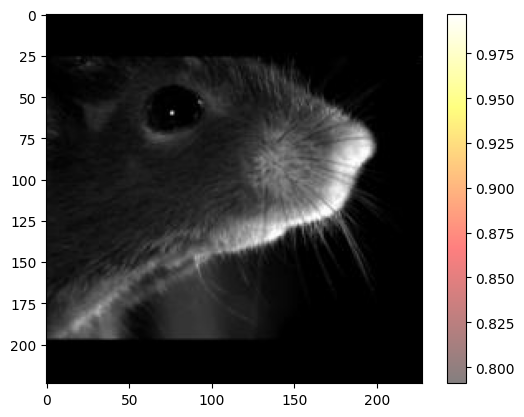

In [11]:
# Assuming att_mat is obtained from your model
#logits, att_mat = model(x.unsqueeze(0)) # logits kunne vaere predictions, hvor kommer 197 fra?
logits, att_mat = model.forward(x.unsqueeze(0))
att_mat = torch.stack(att_mat).squeeze(1)
print(att_mat)

# Average the attention weights across all heads.
att_mat = torch.mean(att_mat, dim=1)

# To account for residual connections, we add an identity matrix to the
# attention matrix and re-normalize the weights.
residual_att = torch.eye(att_mat.size(1))
aug_att_mat = att_mat + residual_att
aug_att_mat = aug_att_mat / aug_att_mat.sum(dim=-1).unsqueeze(-1)

# Recursively multiply the weight matrices
joint_attentions = torch.zeros(aug_att_mat.size())
joint_attentions[0] = aug_att_mat[0]

for n in range(1, aug_att_mat.size(0)):
    joint_attentions[n] = torch.matmul(aug_att_mat[n], joint_attentions[n-1])
    
# Attention from the output token to the input space.
v = joint_attentions[-1]
grid_size = int(np.sqrt(aug_att_mat.size(-1)))
mask = v[0, 1:].reshape(grid_size, grid_size).detach().numpy()
mask = cv2.resize(mask / mask.max(), im.size)

# Create a heatmap using 'hot' colormap
heatmap = plt.imshow(mask, cmap='hot', interpolation='nearest')

# Apply alpha channel to the heatmap
heatmap.set_alpha(0.5)

# Display the original image
plt.imshow(im)

# Show the colorbar
plt.colorbar(heatmap)

plt.show()

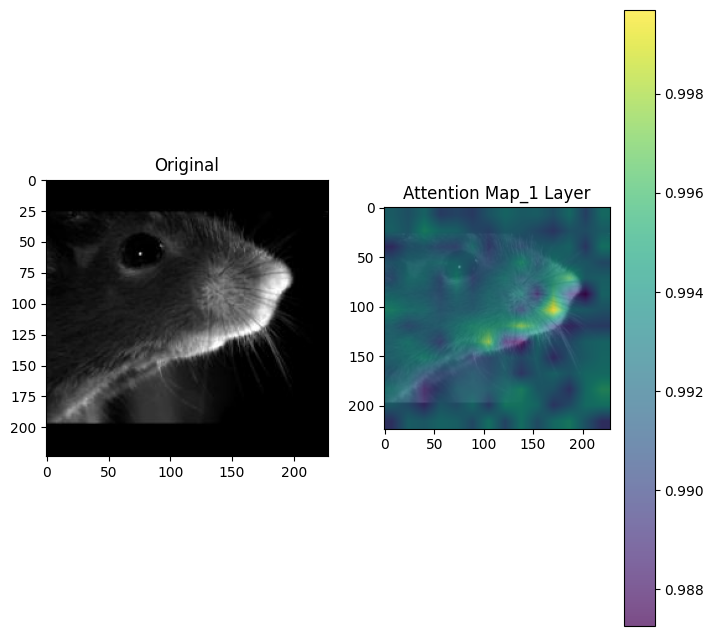

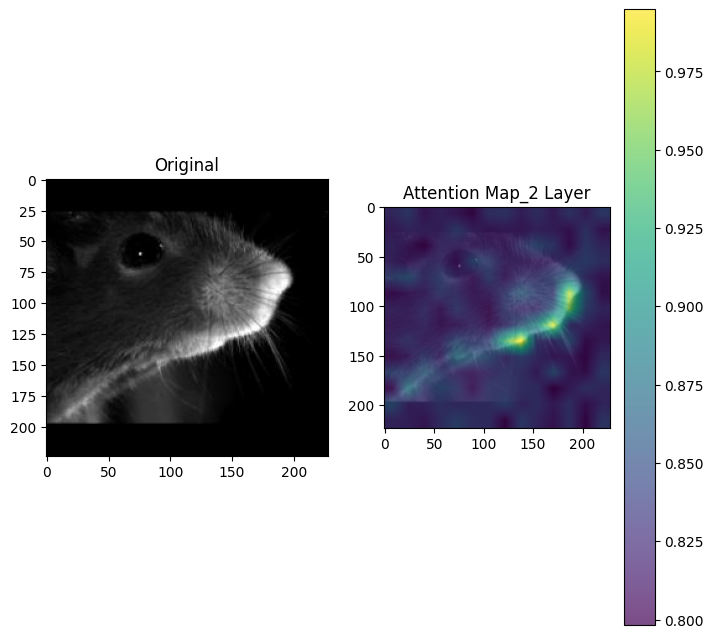

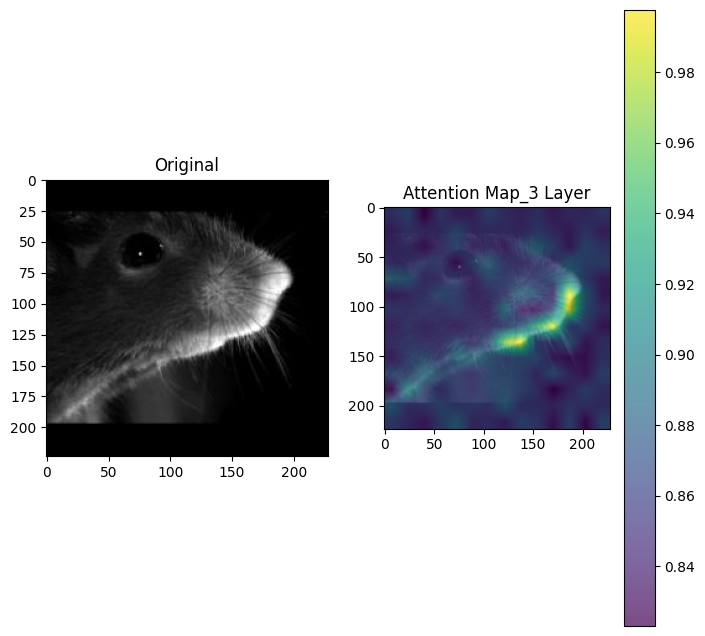

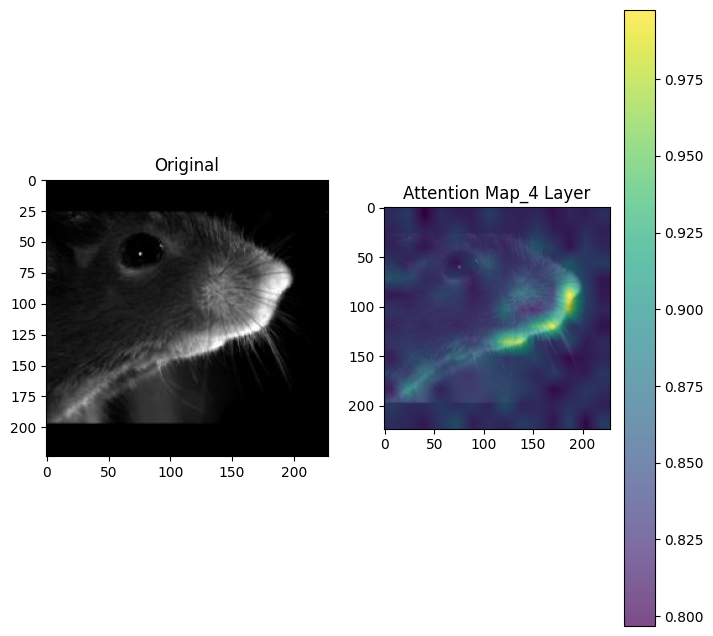

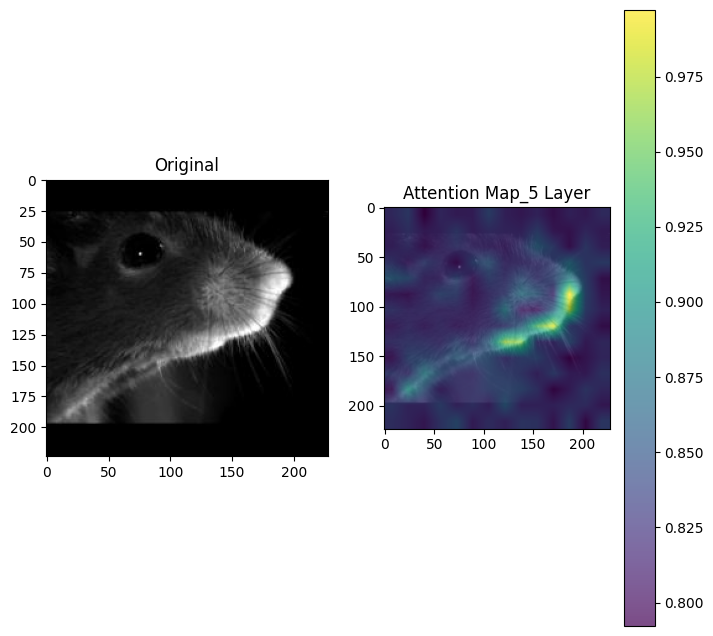

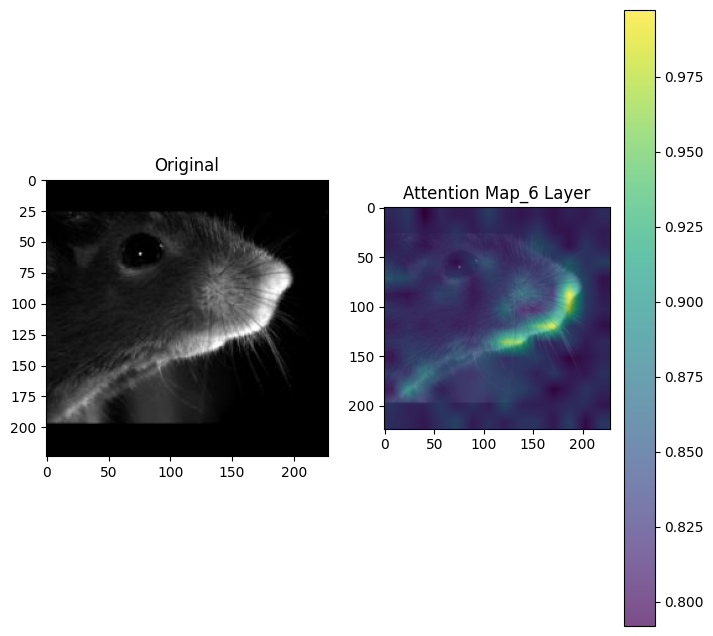

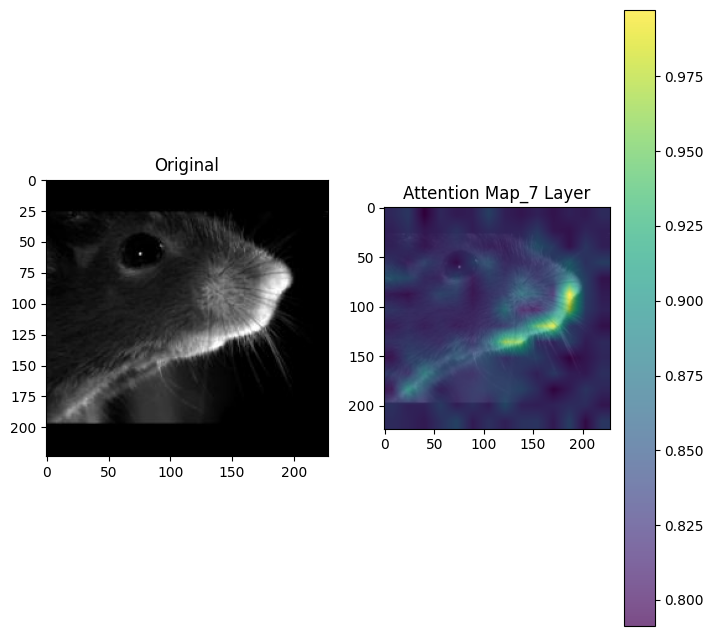

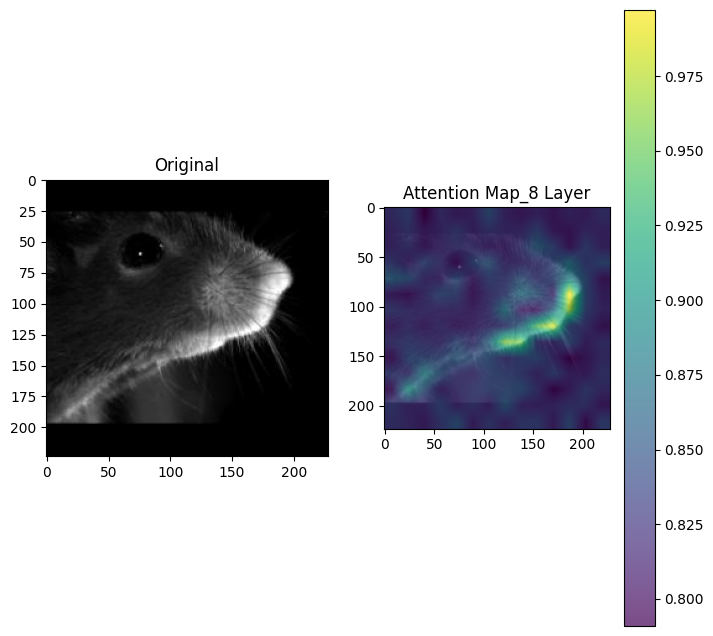

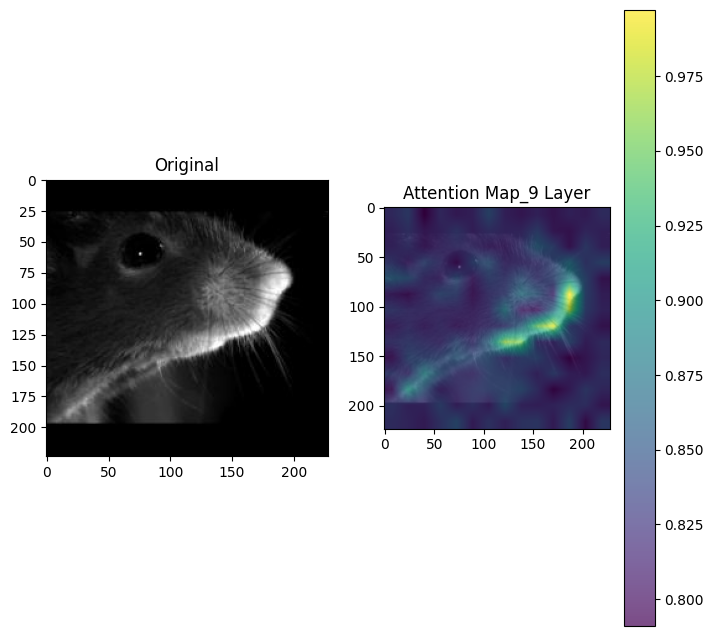

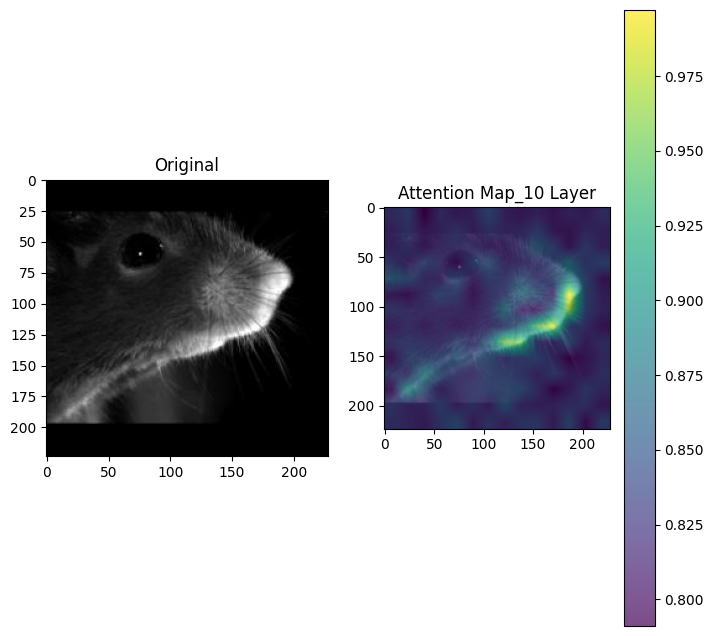

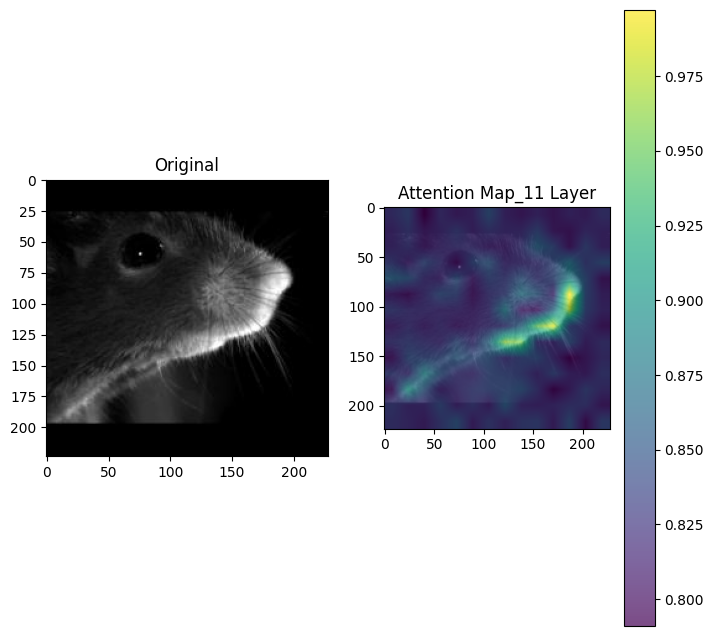

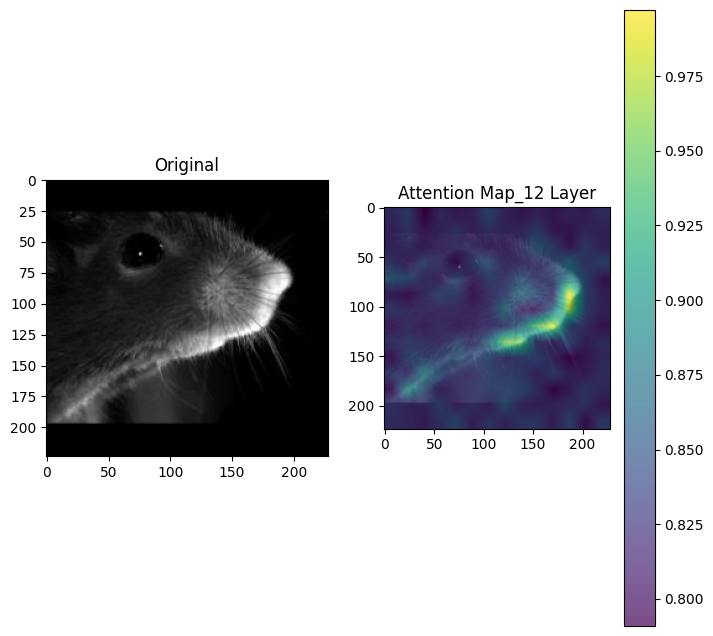

In [12]:
for i, v in enumerate(joint_attentions):
    # Attention from the output token to the input space.
    mask = v[0, 1:].reshape(grid_size, grid_size).detach().numpy()
    mask = cv2.resize(mask / mask.max(), im.size)[..., np.newaxis]
    result = (mask * im).astype("uint8")

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 8))
    ax1.set_title('Original')
    ax2.set_title('Attention Map_%d Layer' % (i+1))
    _ = ax1.imshow(im)
    _ = ax2.imshow(im)
    cax = ax2.imshow(mask, alpha=.7, cmap = 'viridis')
    fig.colorbar(cax, ax=ax2, orientation='vertical')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


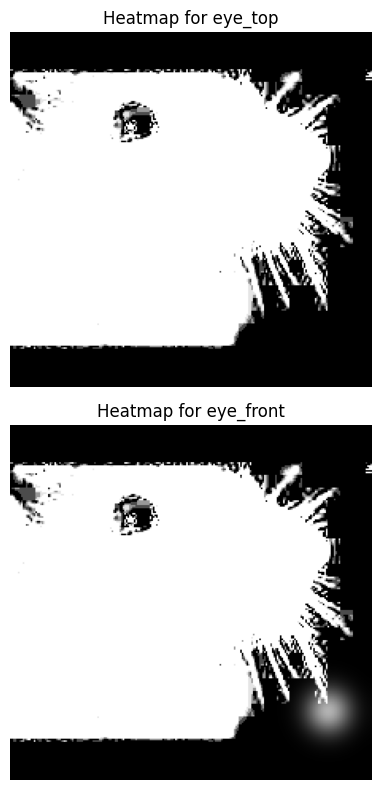

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Function to calculate attention map for a key point
def calculate_attention_map(keypoint_data, image_shape):
    # Generate a blank image with the same shape as the original image
    attention_map = np.zeros(image_shape[:2], dtype=np.float32)
    
    # Extract key point coordinates
    x, y = keypoint_data
    
    # Set the attention value at the key point location
    attention_map[y, x] = 1.0  # You might need to adjust the indexing based on the format of your key point data
    
    # Apply Gaussian blur to smoothen the attention map
    attention_map = gaussian_filter(attention_map, sigma=10)  # Adjust the sigma value as needed
    
    # Normalize attention map to [0, 1]
    attention_map = attention_map / np.max(attention_map)
    
    return attention_map

# Function to overlay attention map on original image with transparency
def overlay_attention_map(image, attention_map, alpha=0.7):
    # Convert attention map to 3-channel image
    attention_map = np.expand_dims(attention_map, axis=2)
    attention_map = np.tile(attention_map, (1, 1, 3))
    
    # Apply transparency to attention map
    overlay = image.copy()
    overlay = cv2.addWeighted(overlay.astype(np.float32), 1 - alpha, attention_map, alpha, 0)
    
    return overlay

# Load original image
original_image = cv2.imread("augmented_data_test/img8504_flip_rescale_augmented.jpg")  # Replace "original_image.jpg" with the path to your original image

# Define the coordinates of each key point
keypoints = {
    "eye_top": (100, 150),
    "eye_front": (200, 180),
    # Add more key points as needed
}

# Plot attention maps for each key point
plt.figure(figsize=(10, 8))
for idx, (key, keypoint_data) in enumerate(keypoints.items(), 1):
    # Calculate attention map for the current key point
    attention_map = calculate_attention_map(keypoint_data, original_image.shape)
    
    # Overlay attention map on original image
    overlaid_image = overlay_attention_map(original_image, attention_map)
    
    # Plot the overlaid image
    plt.subplot(2, len(keypoints)//2, idx)
    plt.imshow(cv2.cvtColor(overlaid_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Heatmap for {key}")
    plt.axis("off")

plt.tight_layout()
plt.show()